<h1 style="text-align: center;">  University of Exeter HPDM099/ OPRI UK Internship Project Code</h1>
<h1 style="text-align: center;">  "Age of Asthma Onset" </h1>

## Imports

In [1]:
# Uncomment below if package not installed
# ! pip install mpl-scatter-density

In [2]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats
from scipy.stats import gaussian_kde
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# Local files
imp_df = pd.read_csv('asthma_onset.csv',  low_memory=False)
print("N:", len(imp_df))
imp_df.head()

N: 340044


,patid,idx_dte,joined_date,leaving_date,extraction_date,practice_id,year_of_birth,sex_coded,age,asthma_qof_dx,...,ba_12m_maint_therapy,gina_step,ba_eosinophil_dte,ba_eosinophil_count,referral_secondary_care,ba_nasal_steroid_rx,ba_spacer_device,other_chronic_resp_dx,other_chronic_resp_first,other_chronic_resp_last
0,44579511,17/2/2023,27/9/2018,17/2/2023,31/5/2023,154,1999,0,24,1,...,LABA/ICS,4,15/8/2022,0.22,26/3/2021,0,1,0,NaN,NaN
1,44579975,1/8/2010,15/2/1995,1/8/2010,22/12/2015,91,1926,1,84,1,...,LABA/ICS,4,6/8/2009,0.30,NaN,0,0,0,NaN,NaN
2,44581698,31/5/2023,5/1/1998,NaN,31/5/2023,443,1997,0,26,1,...,LABA/ICS,3,5/10/2022,0.40,2/8/2011,3,0,0,NaN,NaN
3,44583120,18/9/2019,12/1/1999,18/9/2019,9/6/2023,74,1998,0,21,1,...,ICS/LTRA,3,20/8/2018,0.43,NaN,0,1,0,NaN,NaN
4,44584756,31/5/2023,5/10/2001,NaN,31/5/2023,594,2001,0,22,1,...,LABA/ICS,3,26/5/2022,1.10,NaN,1,0,0,NaN,NaN


## Dataset Cleaning

In [4]:
for col in imp_df:
    print(col, '\t', imp_df[col].dtype)

patid 	 int64
idx_dte 	 object
joined_date 	 object
leaving_date 	 object
extraction_date 	 object
practice_id 	 int64
year_of_birth 	 int64
sex_coded 	 int64
age 	 int64
asthma_qof_dx 	 int64
asthma_qof_first_dx 	 object
asthma_qof_last_dx 	 object
asthma_qof_age_of_onset 	 int64
smoking_status 	 int64
height_dte 	 object
height 	 float64
weight_dte 	 object
weight 	 float64
bmi_dte 	 object
bmi 	 float64
rhinitis_dx 	 int64
rhinitis_dx_active 	 int64
rhinitis_dx_first 	 object
rhinitis_dx_last 	 object
eczema_dx 	 int64
eczema_dx_active 	 int64
eczema_dx_first 	 object
eczema_dx_last 	 object
nasal_polyps_dx 	 int64
nasal_polyps_dx_first 	 object
nasal_polyps_dx_last 	 object
pneumonia_dx 	 int64
ba_pneumonia_dx 	 int64
pneumonia_dx_first 	 object
pneumonia_dx_last 	 object
gerd_dx 	 int64
gerd_active_dx 	 int64
gerd_dx_first 	 object
gerd_dx_last 	 object
diabetes_dx 	 int64
diabetes_active_dx 	 int64
diabetes_dx_first 	 float64
diabetes_dx_last 	 float64
sleep_apnoea_dx 	 int64
sle

In [5]:
# Change to appropriate datatype for each column
df = imp_df.copy()
df.head()

,patid,idx_dte,joined_date,leaving_date,extraction_date,practice_id,year_of_birth,sex_coded,age,asthma_qof_dx,...,ba_12m_maint_therapy,gina_step,ba_eosinophil_dte,ba_eosinophil_count,referral_secondary_care,ba_nasal_steroid_rx,ba_spacer_device,other_chronic_resp_dx,other_chronic_resp_first,other_chronic_resp_last
0,44579511,17/2/2023,27/9/2018,17/2/2023,31/5/2023,154,1999,0,24,1,...,LABA/ICS,4,15/8/2022,0.22,26/3/2021,0,1,0,NaN,NaN
1,44579975,1/8/2010,15/2/1995,1/8/2010,22/12/2015,91,1926,1,84,1,...,LABA/ICS,4,6/8/2009,0.30,NaN,0,0,0,NaN,NaN
2,44581698,31/5/2023,5/1/1998,NaN,31/5/2023,443,1997,0,26,1,...,LABA/ICS,3,5/10/2022,0.40,2/8/2011,3,0,0,NaN,NaN
3,44583120,18/9/2019,12/1/1999,18/9/2019,9/6/2023,74,1998,0,21,1,...,ICS/LTRA,3,20/8/2018,0.43,NaN,0,1,0,NaN,NaN
4,44584756,31/5/2023,5/10/2001,NaN,31/5/2023,594,2001,0,22,1,...,LABA/ICS,3,26/5/2022,1.10,NaN,1,0,0,NaN,NaN


In [6]:
date_col = ['idx_dte', 'joined_date', 'leaving_date', 'extraction_date', 'asthma_qof_first_dx', 'asthma_qof_last_dx', 
            'height_dte', 'weight_dte', 'bmi_dte', 'rhinitis_dx_first', 'rhinitis_dx_last', 'eczema_dx_first', 
            'eczema_dx_last', 'nasal_polyps_dx_first', 'nasal_polyps_dx_last', 'pneumonia_dx_first', 'pneumonia_dx_last', 
            'gerd_dx_first', 'gerd_dx_last', 'sleep_apnoea_dx_first', 'sleep_apnoea_dx_last', 'sleep_disorder_dx_first', 
            'sleep_disorder_dx_last', 'fev1_dte', 'fvc_dte', 'fvc_ratio_dte', 'fev1_perc_pred_dte', 'ba_rcp_activity_dte', 
            'ba_rcp_day_dte', 'ba_rcp_night_dte', 'ba_pefr_dte', 'ba_pefr_height_dte', 'first_biologic_dte', 
            'last_biologic_dte', 'ba_eosinophil_dte', 'referral_secondary_care', 'other_chronic_resp_first', 'other_chronic_resp_last']
for col in date_col:
    # df[col] = df[col].astype('datetime64[ns]')
    # df[col] = pd.to_datetime(df[col], infer_datetime_format=True)
    # format = '%d%m%y'
    df[col] = pd.to_datetime(df[col], format = '%d/%m/%Y')
    print(col, '\t', df[col].dtype)
df.head()

idx_dte 	 datetime64[ns]
joined_date 	 datetime64[ns]
leaving_date 	 datetime64[ns]
extraction_date 	 datetime64[ns]
asthma_qof_first_dx 	 datetime64[ns]
asthma_qof_last_dx 	 datetime64[ns]
height_dte 	 datetime64[ns]
weight_dte 	 datetime64[ns]
bmi_dte 	 datetime64[ns]
rhinitis_dx_first 	 datetime64[ns]
rhinitis_dx_last 	 datetime64[ns]
eczema_dx_first 	 datetime64[ns]
eczema_dx_last 	 datetime64[ns]
nasal_polyps_dx_first 	 datetime64[ns]
nasal_polyps_dx_last 	 datetime64[ns]
pneumonia_dx_first 	 datetime64[ns]
pneumonia_dx_last 	 datetime64[ns]
gerd_dx_first 	 datetime64[ns]
gerd_dx_last 	 datetime64[ns]
sleep_apnoea_dx_first 	 datetime64[ns]
sleep_apnoea_dx_last 	 datetime64[ns]
sleep_disorder_dx_first 	 datetime64[ns]
sleep_disorder_dx_last 	 datetime64[ns]
fev1_dte 	 datetime64[ns]
fvc_dte 	 datetime64[ns]
fvc_ratio_dte 	 datetime64[ns]
fev1_perc_pred_dte 	 datetime64[ns]
ba_rcp_activity_dte 	 datetime64[ns]
ba_rcp_day_dte 	 datetime64[ns]
ba_rcp_night_dte 	 datetime64[ns]
ba_pefr

,patid,idx_dte,joined_date,leaving_date,extraction_date,practice_id,year_of_birth,sex_coded,age,asthma_qof_dx,...,ba_12m_maint_therapy,gina_step,ba_eosinophil_dte,ba_eosinophil_count,referral_secondary_care,ba_nasal_steroid_rx,ba_spacer_device,other_chronic_resp_dx,other_chronic_resp_first,other_chronic_resp_last
0,44579511,2023-02-17,2018-09-27,2023-02-17,2023-05-31,154,1999,0,24,1,...,LABA/ICS,4,2022-08-15,0.22,2021-03-26,0,1,0,NaT,NaT
1,44579975,2010-08-01,1995-02-15,2010-08-01,2015-12-22,91,1926,1,84,1,...,LABA/ICS,4,2009-08-06,0.30,NaT,0,0,0,NaT,NaT
2,44581698,2023-05-31,1998-01-05,NaT,2023-05-31,443,1997,0,26,1,...,LABA/ICS,3,2022-10-05,0.40,2011-08-02,3,0,0,NaT,NaT
3,44583120,2019-09-18,1999-01-12,2019-09-18,2023-06-09,74,1998,0,21,1,...,ICS/LTRA,3,2018-08-20,0.43,NaT,0,1,0,NaT,NaT
4,44584756,2023-05-31,2001-10-05,NaT,2023-05-31,594,2001,0,22,1,...,LABA/ICS,3,2022-05-26,1.10,NaT,1,0,0,NaT,NaT


In [7]:
# Remove rows with negative age of asthma onset
df = df[df['asthma_qof_age_of_onset'] >= 0] 
print("N:", len(df))

N: 340020


In [8]:
# Remove rows without spirometry recorded
df = df[df['spirometry_recorded'] == 1] 
print("N:", len(df))

N: 92604


## Objective 1 -- Univariate analyses

### Histogram of age of onset

Example:
![image](Example/Obj1-Age.png)

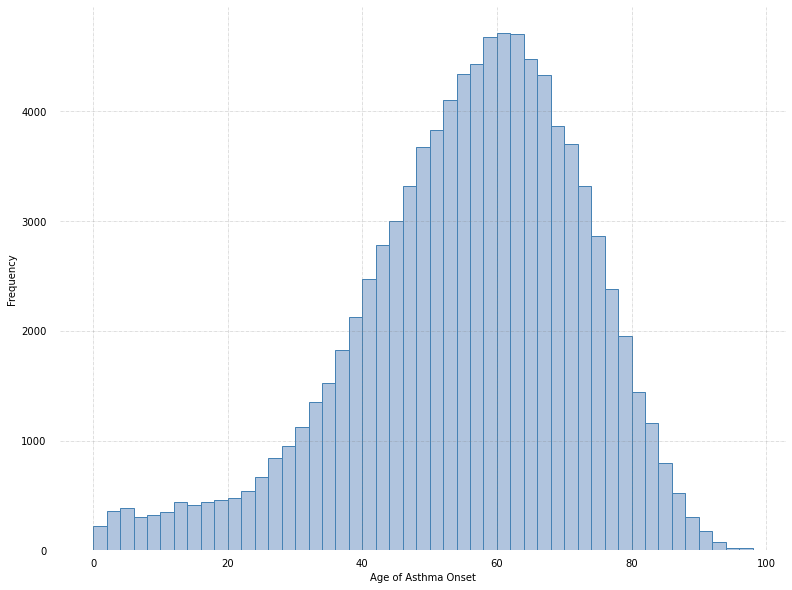

In [9]:
# Creating histogram
fig, ax = plt.subplots(1, 1, figsize =(13, 10))

# Setting Font size
plt.rcParams.update({'font.size': 16})

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')    

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(visible = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.5)

# Creating histogram
plt.hist(df['asthma_qof_age_of_onset'], bins = np.arange(0, 100, 2), color = "lightsteelblue", edgecolor = "steelblue")

# Adding Labels
ax.set_xlabel('Age of Asthma Onset')
ax.set_ylabel('Frequency')

#plt.savefig("Result/1_all.png")
plt.show()

In [10]:
print('N = ', "{:.0f}".format(df['asthma_qof_age_of_onset'].describe()[0]))
print('Mean = ', "{:.4f}".format(df['asthma_qof_age_of_onset'].describe()[1]))
print('SD = ', "{:.4f}".format(df['asthma_qof_age_of_onset'].describe()[2]))

N =  92604
Mean =  55.1832
SD =  16.9624


### Histograms of age of onset for the following categories:<20, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, >90

Example:
![image](Example/Obj1-Age(Gp).png)

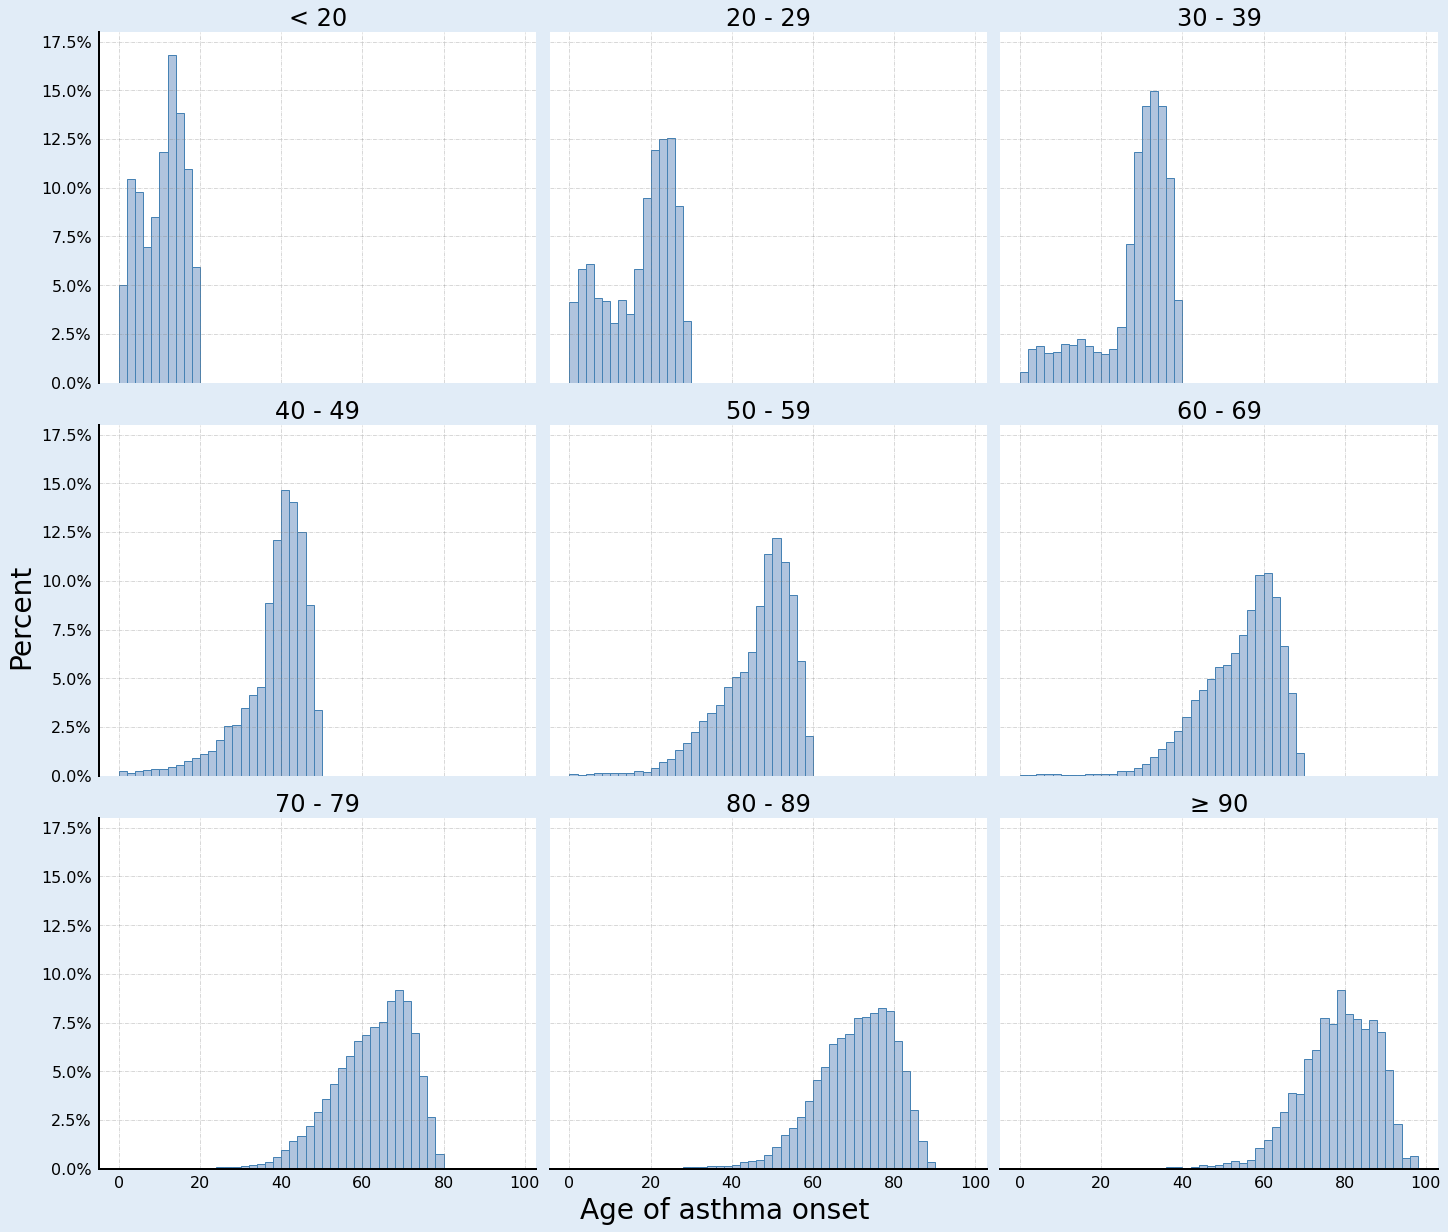

In [11]:
age_group = [0, 20, 30, 40, 50, 60, 70, 80, 90, 999]

# Creating histogram
fig, ax = plt.subplots(3, 3, figsize =(20, 17), layout='constrained', facecolor='#e1ecf7')

# Setting Font size
plt.rcParams.update({'font.size': 20})

# Creating histogram
age_idx = 0
for i in range(0,3):
    for j in range(0,3):
        tmp = df[df['age'] >= age_group[age_idx]]
        tmp = tmp[tmp['age'] < age_group[age_idx + 1]]
        ax[i, j].hist(tmp['asthma_qof_age_of_onset'], bins = np.arange(0, 100, 2), color = "lightsteelblue", range = (0,100), edgecolor = "steelblue",
                     weights = np.ones(len(tmp['asthma_qof_age_of_onset'])) / len(tmp['asthma_qof_age_of_onset']))
        
        ax[i,j].set_ylim([0, 0.18])
        ax[i,j].yaxis.set_major_formatter(PercentFormatter(1))
        ax[i, j].grid(visible = True, color ='grey', linestyle = '-.', linewidth = 0.6, alpha = 0.5)
        
        # Remove axes splines
        for s in ['top', 'bottom', 'left', 'right']:
            ax[i, j].spines[s].set_linewidth(2)
            if i == 2:
                if s == 'bottom':
                    continue
            if j == 0:
                if s == 'left':
                    continue                    
            ax[i, j].spines[s].set_visible(False)
                
        ax[i, j].xaxis.set_ticks_position('none')
        ax[i, j].yaxis.set_ticks_position('none')    
        
        title = str(age_group[age_idx]) + " - " +str(age_group[age_idx + 1] - 1)
        ax[i, j].set_title(title)
        age_idx += 1
        
# Adding Labels and Layout
fig.supxlabel('Age of asthma onset', fontsize = 28)
fig.supylabel('Percent', fontsize = 28)
ax[0, 0].set_title('< 20')
ax[2, 2].set_title('≥ 90')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for axs in ax.flat:
    axs.label_outer()

#plt.savefig("Result/1_gp.png")    
plt.show()

In [12]:
age_group = [0, 20, 30, 40, 50, 60, 70, 80, 90, 999]

for k in range(0,9):
    tmp = df[df['age'] >= age_group[k]]
    tmp = tmp[tmp['age'] < age_group[k + 1]]
    des = str(age_group[k]) + " - " +str(age_group[k + 1] - 1)
    if k == 0:
        des = '< 20'
    if k == 8:
        des = '≥ 90'
    
    print(des)
    print('\t N = ', "{:.0f}".format(tmp['asthma_qof_age_of_onset'].describe()[0]))
    print('\t Mean = ', "{:.4f}".format(tmp['asthma_qof_age_of_onset'].describe()[1]))
    print('\t SD = ', "{:.4f}".format(tmp['asthma_qof_age_of_onset'].describe()[2]))

< 20
	 N =  1352
	 Mean =  10.1398
	 SD =  5.1980
20 - 29
	 N =  2276
	 Mean =  16.8194
	 SD =  8.2466
30 - 39
	 N =  3157
	 Mean =  27.9404
	 SD =  9.0426
40 - 49
	 N =  6287
	 Mean =  37.9251
	 SD =  8.2175
50 - 59
	 N =  12747
	 Mean =  45.4373
	 SD =  9.1729
60 - 69
	 N =  20834
	 Mean =  53.4808
	 SD =  9.6621
70 - 79
	 N =  24608
	 Mean =  61.7415
	 SD =  9.8419
80 - 89
	 N =  17859
	 Mean =  69.8768
	 SD =  9.9820
≥ 90
	 N =  3484
	 Mean =  77.7491
	 SD =  9.6160


## Objective 2 -- Bivariate analyses:

### Distribution of age of onset and gender (overall)

Example:
![image](Example/Obj2-Age+Gender(All).png)

0 = Female

1 = Male

2 = Other *not included as the data number is too low*

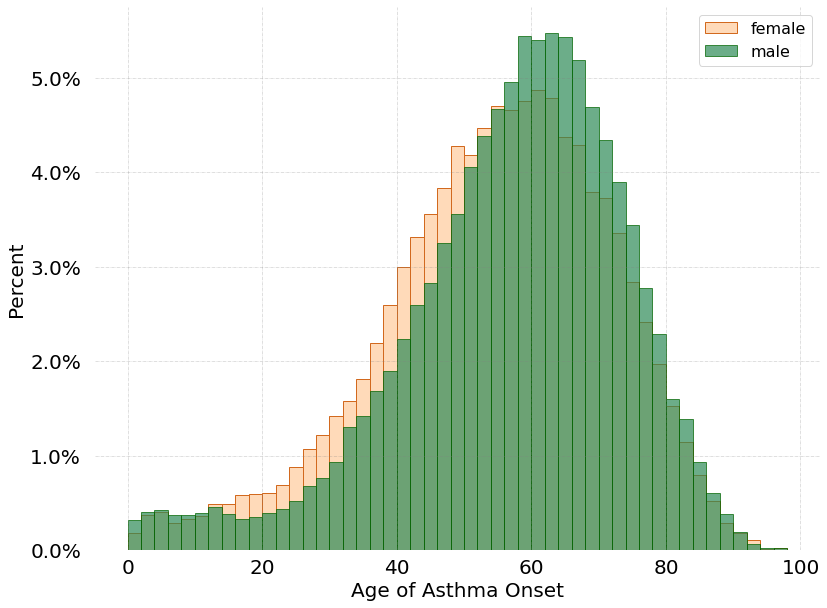

In [13]:
# Creating histogram
fig, ax = plt.subplots(1, 1, figsize =(13, 10))

# Setting Font size
plt.rcParams.update({'font.size': 16})

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')    

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(visible = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.5)

# Creating histogram
female = df[df['sex_coded'] == 0]
male = df[df['sex_coded'] == 1]

plt.hist(female['asthma_qof_age_of_onset'], bins = np.arange(0, 100, 2), color = "peachpuff", label='female', edgecolor = "chocolate",
        weights = np.ones(len(female['asthma_qof_age_of_onset'])) / len(female['asthma_qof_age_of_onset']))
plt.hist(male['asthma_qof_age_of_onset'], bins = np.arange(0, 100, 2), color = "seagreen", label='male', edgecolor = "darkgreen", alpha = 0.7,
        weights = np.ones(len(male['asthma_qof_age_of_onset'])) / len(male['asthma_qof_age_of_onset']))

# Adding Labels
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(loc='upper right')
ax.set_xlabel('Age of Asthma Onset')
ax.set_ylabel('Percent')

#plt.savefig("Result/2_gender_all.png")
plt.show()

In [14]:
print("Female: ")
print('\t N = ', "{:.0f}".format(female['asthma_qof_age_of_onset'].describe()[0]))
print('\t Mean = ', "{:.4f}".format(female['asthma_qof_age_of_onset'].describe()[1]))
print('\t SD = ', "{:.4f}".format(female['asthma_qof_age_of_onset'].describe()[2]))

print("Male: ")
print('\t N = ', "{:.0f}".format(male['asthma_qof_age_of_onset'].describe()[0]))
print('\t Mean = ', "{:.4f}".format(male['asthma_qof_age_of_onset'].describe()[1]))
print('\t SD = ', "{:.4f}".format(male['asthma_qof_age_of_onset'].describe()[2]))

Female: 
	 N =  52816
	 Mean =  54.1160
	 SD =  17.0742
Male: 
	 N =  39788
	 Mean =  56.5997
	 SD =  16.7081


In [15]:
# Anderson-Darling test (test normality)
result = stats.anderson(female['asthma_qof_age_of_onset'])

# Print the results
print("Female Anderson-Darling Test:")
print("\t Statistic:", result.statistic)
print("\t Critical Values:", result.critical_values)
print("\t Significance Levels:", result.significance_level)

# Compare the test statistic with critical values to determine normality
if result.statistic < result.critical_values[2]:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis)")

print("\n")   
    
result = stats.anderson(male['asthma_qof_age_of_onset'])

# Print the results
print("Male Anderson-Darling Test:")
print("\t Statistic:", result.statistic)
print("\t Critical Values:", result.critical_values)
print("\t Significance Levels:", result.significance_level)

# Compare the test statistic with critical values to determine normality
if result.statistic < result.critical_values[2]:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis)")

Female Anderson-Darling Test:
	 Statistic: 227.5262100263135
	 Critical Values: [0.576 0.656 0.787 0.918 1.092]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)


Male Anderson-Darling Test:
	 Statistic: 364.82929117960157
	 Critical Values: [0.576 0.656 0.787 0.918 1.092]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)


In [16]:
# Mann-Whitney U Test
statistic, p_value = stats.mannwhitneyu(male['asthma_qof_age_of_onset'], female['asthma_qof_age_of_onset'])

# Print the results
print("Mann-Whitney U Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

# Check the significance level to determine if there is a significant difference
alpha = 0.05
if p_value > alpha:
    print("There is no significant difference in age of asthma onset between genders (fail to reject the null hypothesis)")
else:
    print("There is a significant difference in age of asthma onset between genders (reject the null hypothesis)")

Mann-Whitney U Test:
Statistic: 1150136663.0
p-value: 1.3229294526511775e-134
There is a significant difference in age of asthma onset between genders (reject the null hypothesis)


### Distribution of age of onset and gender (by age group)

Example:
![image](Example/Obj2-Age+Gender(Gp).png)

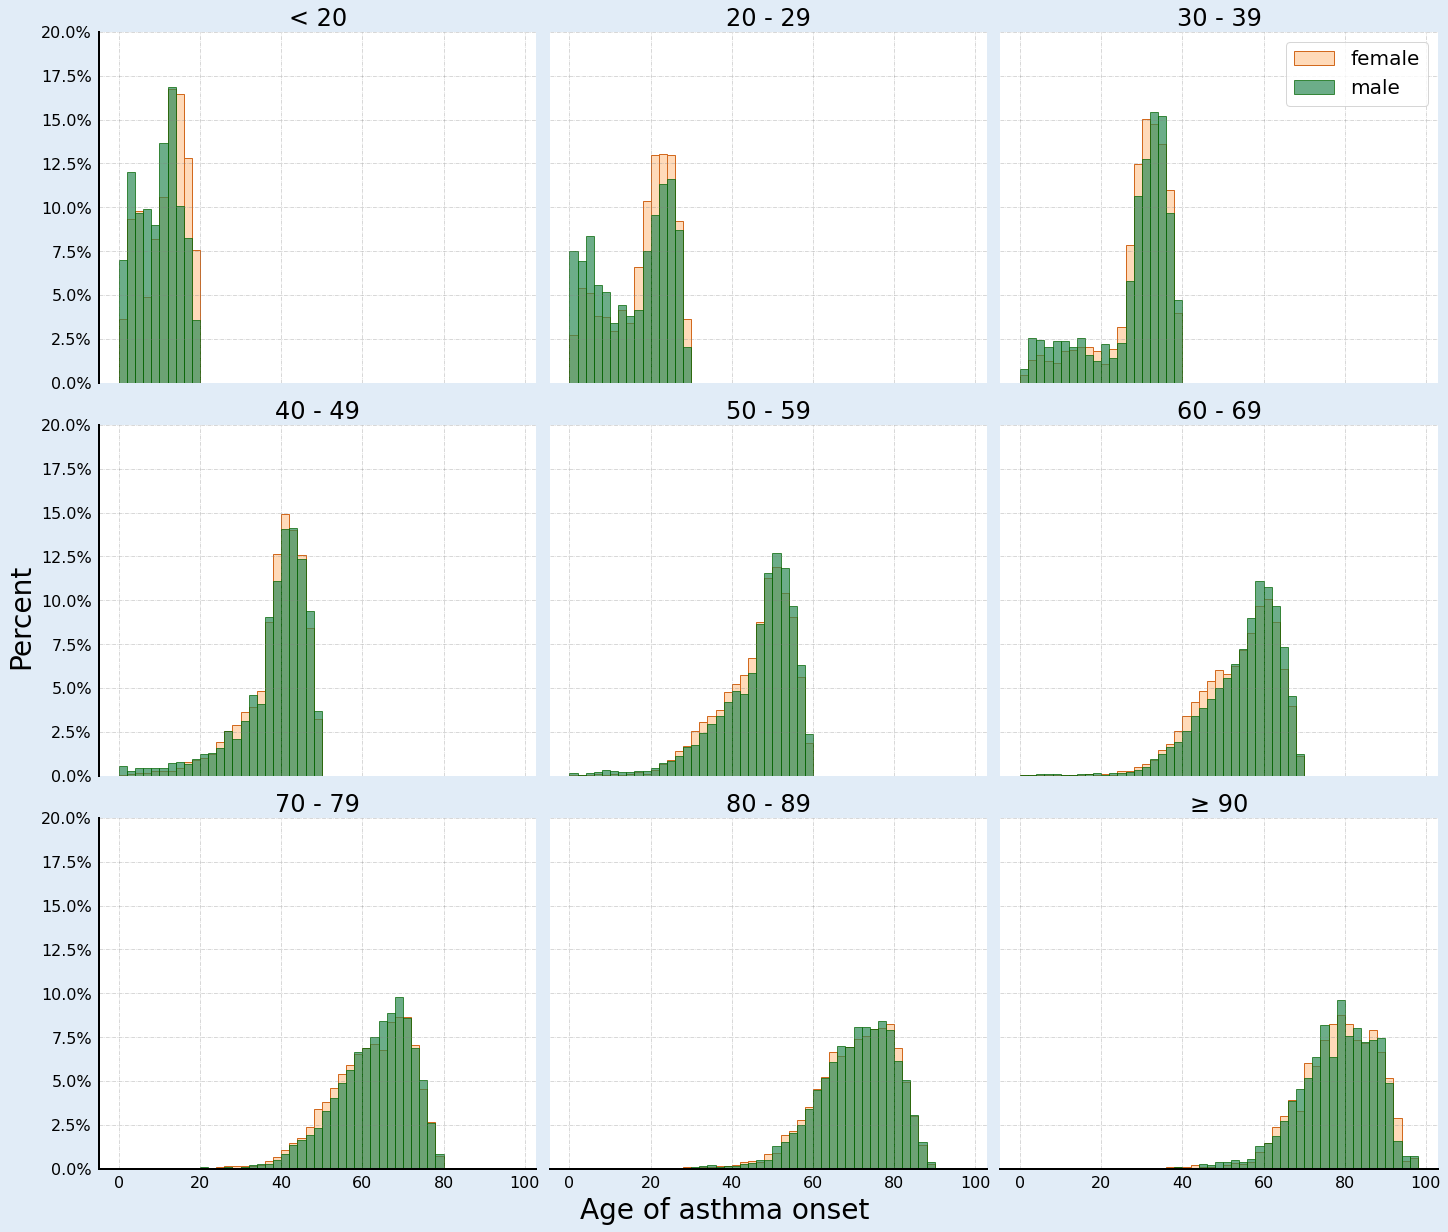

In [17]:
age_group = [0, 20, 30, 40, 50, 60, 70, 80, 90, 999]

# Creating histogram
fig, ax = plt.subplots(3, 3, figsize =(20, 17), layout='constrained', facecolor='#e1ecf7')

# Setting Font size
plt.rcParams.update({'font.size': 20})

# Creating histogram
age_idx = 0
for i in range(0,3):
    for j in range(0,3):
        tmp = df[df['age'] >= age_group[age_idx]]
        tmp = tmp[tmp['age'] < age_group[age_idx + 1]]

        
        female = tmp[tmp['sex_coded'] == 0]
        male = tmp[tmp['sex_coded'] == 1]

        ax[i, j].hist(female['asthma_qof_age_of_onset'], bins = np.arange(0, 100, 2), color = "peachpuff", label='female', edgecolor = "chocolate",
                 weights = np.ones(len(female['asthma_qof_age_of_onset'])) / len(female['asthma_qof_age_of_onset']))
        ax[i, j].hist(male['asthma_qof_age_of_onset'], bins = np.arange(0, 100, 2), color = "seagreen", label='male', edgecolor = "darkgreen", alpha = 0.7,
                 weights = np.ones(len(male['asthma_qof_age_of_onset'])) / len(male['asthma_qof_age_of_onset']))
        
        
        ax[i, j].set_ylim([0, 0.20])
        ax[i, j].yaxis.set_major_formatter(PercentFormatter(1))
        ax[i, j].grid(visible = True, color ='grey', linestyle = '-.', linewidth = 0.6, alpha = 0.5)
        
        # Remove axes splines
        for s in ['top', 'bottom', 'left', 'right']:
            ax[i, j].spines[s].set_linewidth(2)
            if i == 2:
                if s == 'bottom':
                    continue
            if j == 0:
                if s == 'left':
                    continue                    
            ax[i, j].spines[s].set_visible(False)
                
        ax[i, j].xaxis.set_ticks_position('none')
        ax[i, j].yaxis.set_ticks_position('none')    
        
        title = str(age_group[age_idx]) + " - " +str(age_group[age_idx + 1] - 1)
        ax[i, j].set_title(title)
        age_idx += 1
        
# Adding Labels and Layout
fig.supxlabel('Age of asthma onset', fontsize = 28)
fig.supylabel('Percent', fontsize = 28)
ax[0, 0].set_title('< 20')
ax[2, 2].set_title('≥ 90')
ax[0, 2].legend()

# Hide x labels and tick labels for top plots and y ticks for right plots.
for axs in ax.flat:
    axs.label_outer()

#plt.savefig("Result/2_gender_gp.png")    
plt.show()

In [18]:
age_group = [0, 20, 30, 40, 50, 60, 70, 80, 90, 999]

for k in range(0,9):
    tmp = df[df['age'] >= age_group[k]]
    tmp = tmp[tmp['age'] < age_group[k + 1]]
    female = tmp[tmp['sex_coded'] == 0]
    male = tmp[tmp['sex_coded'] == 1]
    
    des = str(age_group[k]) + " - " +str(age_group[k + 1] - 1)
    if k == 0:
        des = '< 20'
    if k == 8:
        des = '≥ 90'
    
    print(des)
    print("Female: ")
    print('\t N = ', "{:.0f}".format(female['asthma_qof_age_of_onset'].describe()[0]))
    print('\t Mean = ', "{:.4f}".format(female['asthma_qof_age_of_onset'].describe()[1]))
    print('\t SD = ', "{:.4f}".format(female['asthma_qof_age_of_onset'].describe()[2]))

    print("Male: ")
    print('\t N = ', "{:.0f}".format(male['asthma_qof_age_of_onset'].describe()[0]))
    print('\t Mean = ', "{:.4f}".format(male['asthma_qof_age_of_onset'].describe()[1]))
    print('\t SD = ', "{:.4f}".format(male['asthma_qof_age_of_onset'].describe()[2]))

< 20
Female: 
	 N =  795
	 Mean =  10.8113
	 SD =  5.1652
Male: 
	 N =  557
	 Mean =  9.1813
	 SD =  5.0977
20 - 29
Female: 
	 N =  1596
	 Mean =  17.5207
	 SD =  7.8515
Male: 
	 N =  680
	 Mean =  15.1735
	 SD =  8.8983
30 - 39
Female: 
	 N =  2018
	 Mean =  28.3226
	 SD =  8.4841
Male: 
	 N =  1139
	 Mean =  27.2634
	 SD =  9.9234
40 - 49
Female: 
	 N =  4049
	 Mean =  38.1008
	 SD =  7.7141
Male: 
	 N =  2238
	 Mean =  37.6072
	 SD =  9.0506
50 - 59
Female: 
	 N =  7815
	 Mean =  45.2985
	 SD =  8.8880
Male: 
	 N =  4932
	 Mean =  45.6571
	 SD =  9.6039
60 - 69
Female: 
	 N =  11838
	 Mean =  53.0645
	 SD =  9.5965
Male: 
	 N =  8996
	 Mean =  54.0285
	 SD =  9.7212
70 - 79
Female: 
	 N =  13353
	 Mean =  61.4310
	 SD =  9.9245
Male: 
	 N =  11255
	 Mean =  62.1099
	 SD =  9.7305
80 - 89
Female: 
	 N =  9437
	 Mean =  69.7820
	 SD =  10.0280
Male: 
	 N =  8422
	 Mean =  69.9829
	 SD =  9.9297
≥ 90
Female: 
	 N =  1915
	 Mean =  77.9123
	 SD =  9.5621
Male: 
	 N =  1569
	 Mean =  77.

In [19]:
for k in range(0,9):
    tmp = df[df['age'] >= age_group[k]]
    tmp = tmp[tmp['age'] < age_group[k + 1]]
    female = tmp[tmp['sex_coded'] == 0]
    male = tmp[tmp['sex_coded'] == 1]
    
    des = str(age_group[k]) + " - " +str(age_group[k + 1] - 1)
    if k == 0:
        des = '< 20'
    if k == 8:
        des = '≥ 90'
    
    print(des)
    
    # Anderson-Darling test (test normality)
    result = stats.anderson(female['asthma_qof_age_of_onset'])

    # Print the results
    print("Female Anderson-Darling Test:")
    print("\t Statistic:", result.statistic)
    print("\t Critical Values:", result.critical_values)
    print("\t Significance Levels:", result.significance_level)

    # Compare the test statistic with critical values to determine normality
    if result.statistic < result.critical_values[2]:
        print("The data follows a normal distribution (fail to reject the null hypothesis)")
    else:
        print("The data does not follow a normal distribution (reject the null hypothesis)")


    result = stats.anderson(male['asthma_qof_age_of_onset'])

    # Print the results
    print("Male Anderson-Darling Test:")
    print("\t Statistic:", result.statistic)
    print("\t Critical Values:", result.critical_values)
    print("\t Significance Levels:", result.significance_level)

    # Compare the test statistic with critical values to determine normality
    if result.statistic < result.critical_values[2]:
        print("The data follows a normal distribution (fail to reject the null hypothesis)")
    else:
        print("The data does not follow a normal distribution (reject the null hypothesis)")
    
    print("\n")

< 20
Female Anderson-Darling Test:
	 Statistic: 16.27879229483949
	 Critical Values: [0.573 0.653 0.783 0.913 1.087]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)
Male Anderson-Darling Test:
	 Statistic: 7.081106393233085
	 Critical Values: [0.572 0.651 0.781 0.912 1.084]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)


20 - 29
Female Anderson-Darling Test:
	 Statistic: 51.92930189202502
	 Critical Values: [0.575 0.654 0.785 0.916 1.089]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)
Male Anderson-Darling Test:
	 Statistic: 21.84468199782077
	 Critical Values: [0.573 0.652 0.782 0.913 1.086]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)


30 - 39
Female Anderson-Darling Tes

In [20]:
for k in range(0,9):
    tmp = df[df['age'] >= age_group[k]]
    tmp = tmp[tmp['age'] < age_group[k + 1]]
    female = tmp[tmp['sex_coded'] == 0]
    male = tmp[tmp['sex_coded'] == 1]
    
    des = str(age_group[k]) + " - " +str(age_group[k + 1] - 1)
    if k == 0:
        des = '< 20'
    if k == 8:
        des = '≥ 90'
    
    print(des)

    # Mann-Whitney U Test
    statistic, p_value = stats.mannwhitneyu(male['asthma_qof_age_of_onset'], female['asthma_qof_age_of_onset'])

    # Print the results
    print("Mann-Whitney U Test:")
    print("Statistic:", statistic)
    print("p-value:", p_value)

    # Check the significance level to determine if there is a significant difference
    alpha = 0.05
    if p_value > alpha:
        print("There is no significant difference in age of asthma onset between genders (fail to reject the null hypothesis)")
    else:
        print("There is a significant difference in age of asthma onset between genders (reject the null hypothesis)")
    print('\n')

< 20
Mann-Whitney U Test:
Statistic: 179411.0
p-value: 2.6139842363923245e-09
There is a significant difference in age of asthma onset between genders (reject the null hypothesis)


20 - 29
Mann-Whitney U Test:
Statistic: 468220.0
p-value: 2.0870570004430476e-07
There is a significant difference in age of asthma onset between genders (reject the null hypothesis)


30 - 39
Mann-Whitney U Test:
Statistic: 1129645.5
p-value: 0.42464079863122806
There is no significant difference in age of asthma onset between genders (fail to reject the null hypothesis)


40 - 49
Mann-Whitney U Test:
Statistic: 4539381.5
p-value: 0.9011117818949863
There is no significant difference in age of asthma onset between genders (fail to reject the null hypothesis)


50 - 59
Mann-Whitney U Test:
Statistic: 20180862.0
p-value: 6.906780059133324e-06
There is a significant difference in age of asthma onset between genders (reject the null hypothesis)


60 - 69
Mann-Whitney U Test:
Statistic: 56928969.0
p-value: 1.05

### Distribution of age of onset and lung function

Lung function

- Mean Percentage predicted Prebronchodilator FEV1
- Percentage predicted Prebronchodilator FEV1: >80% (yes/no) (1/0)
- FEV1/FVC: <0.8 (yes/no) (1/0)

In [21]:
lung_df = df.copy()

lung_df = lung_df[(lung_df['fev1_perc_pred'] >= 0) & (lung_df['fev1_perc_pred'] <= 100)]
lung_df['percent>80'] = np.where(lung_df['fev1_perc_pred'] > 80, 1, 0)

lung_df = lung_df[(lung_df['fvc_ratio'] >= 0) & (lung_df['fvc_ratio'] <= 1)]
lung_df['ratio>80'] = np.where(lung_df['fvc_ratio'] >= 0.8, 1, 0)

lung_df.head()

,patid,idx_dte,joined_date,leaving_date,extraction_date,practice_id,year_of_birth,sex_coded,age,asthma_qof_dx,...,ba_eosinophil_dte,ba_eosinophil_count,referral_secondary_care,ba_nasal_steroid_rx,ba_spacer_device,other_chronic_resp_dx,other_chronic_resp_first,other_chronic_resp_last,percent>80,ratio>80
1,44579975,2010-08-01,1995-02-15,2010-08-01,2015-12-22,91,1926,1,84,1,...,2009-08-06,0.30,NaT,0,0,0,NaT,NaT,0,0
17,44599732,2022-02-21,2001-07-17,2022-02-21,2023-05-31,533,1938,0,84,1,...,2020-11-24,0.15,2015-01-06,0,0,0,NaT,NaT,0,0
23,44604325,2014-07-15,2000-12-04,NaT,2014-07-15,310,1927,0,87,1,...,2013-09-16,0.15,NaT,0,0,0,NaT,NaT,0,0
27,45527039,2010-08-01,2000-07-28,2010-08-01,2015-12-02,529,1928,1,82,1,...,2009-09-25,0.20,NaT,0,0,0,NaT,NaT,0,0
41,45541079,2018-01-01,1994-01-20,2018-01-01,2018-10-30,731,1947,0,71,1,...,NaT,-1.00,NaT,0,0,0,NaT,NaT,1,1


#### Distribution of age of onset and Mean Percentage predicted Prebronchodilator FEV1 (overall)

In [22]:
x = lung_df['asthma_qof_age_of_onset']
y =  lung_df['fev1_perc_pred']


# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

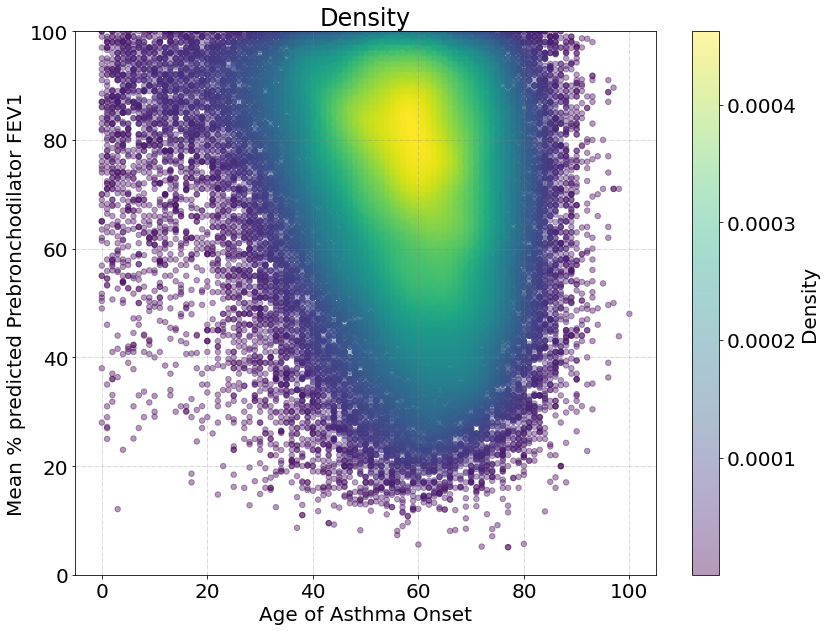

In [23]:
fig, ax = plt.subplots(1, 1, figsize =(13, 10))

plt.scatter(x, y, c = z, alpha=0.4, s = 30)

ax.set_xlabel('Age of Asthma Onset')
ax.set_ylabel('Mean % predicted Prebronchodilator FEV1')
ax.grid(visible = True, color ='grey', linestyle = '-.', linewidth = 0.6, alpha = 0.5)
ax.set_ylim([0, 100])
plt.title('Density')
plt.colorbar(label = 'Density')

#plt.savefig("Result/2_mean_all_density.png")    
plt.show()

Description: 
	 N =  59990
	 Mean =  55.9501
	 SD =  16.3706
Regression:
	 Slope: -0.2244479127356087
	 Intercept: 81.40877683369763
	 R-squared: 0.032309658470672034
	 p-value: 0.0
	 Standard Error: 0.005015166999797877


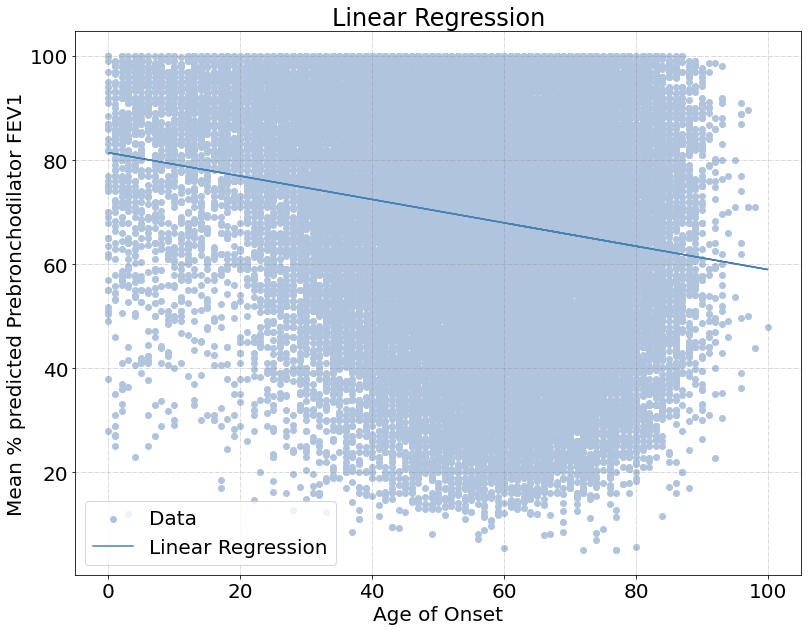

In [24]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create a scatter plot with the linear regression line
fig, ax = plt.subplots(1, 1, figsize =(13, 10))

plt.scatter(x, y, color='lightsteelblue', label='Data')
plt.plot(x, intercept + slope * x, color='steelblue', label='Linear Regression')

ax.grid(visible = True, color ='grey', linestyle = '-.', linewidth = 0.6, alpha = 0.5)
plt.xlabel('Age of Onset')
plt.ylabel('Mean % predicted Prebronchodilator FEV1')
plt.title('Linear Regression')
plt.legend()

# Print regression results
print("Description: ")
print('\t N = ', "{:.0f}".format(lung_df['asthma_qof_age_of_onset'].describe()[0]))
print('\t Mean = ', "{:.4f}".format(lung_df['asthma_qof_age_of_onset'].describe()[1]))
print('\t SD = ', "{:.4f}".format(lung_df['asthma_qof_age_of_onset'].describe()[2]))
print("Regression:")
print("\t Slope:", slope)
print("\t Intercept:", intercept)
print("\t R-squared:", r_value ** 2)
print("\t p-value:", p_value)
print("\t Standard Error:", std_err)

#plt.savefig("Result/2_mean_all_regression.png")    
plt.show()

#### Distribution of age of onset and Mean Percentage predicted Prebronchodilator FEV1 (by age group)

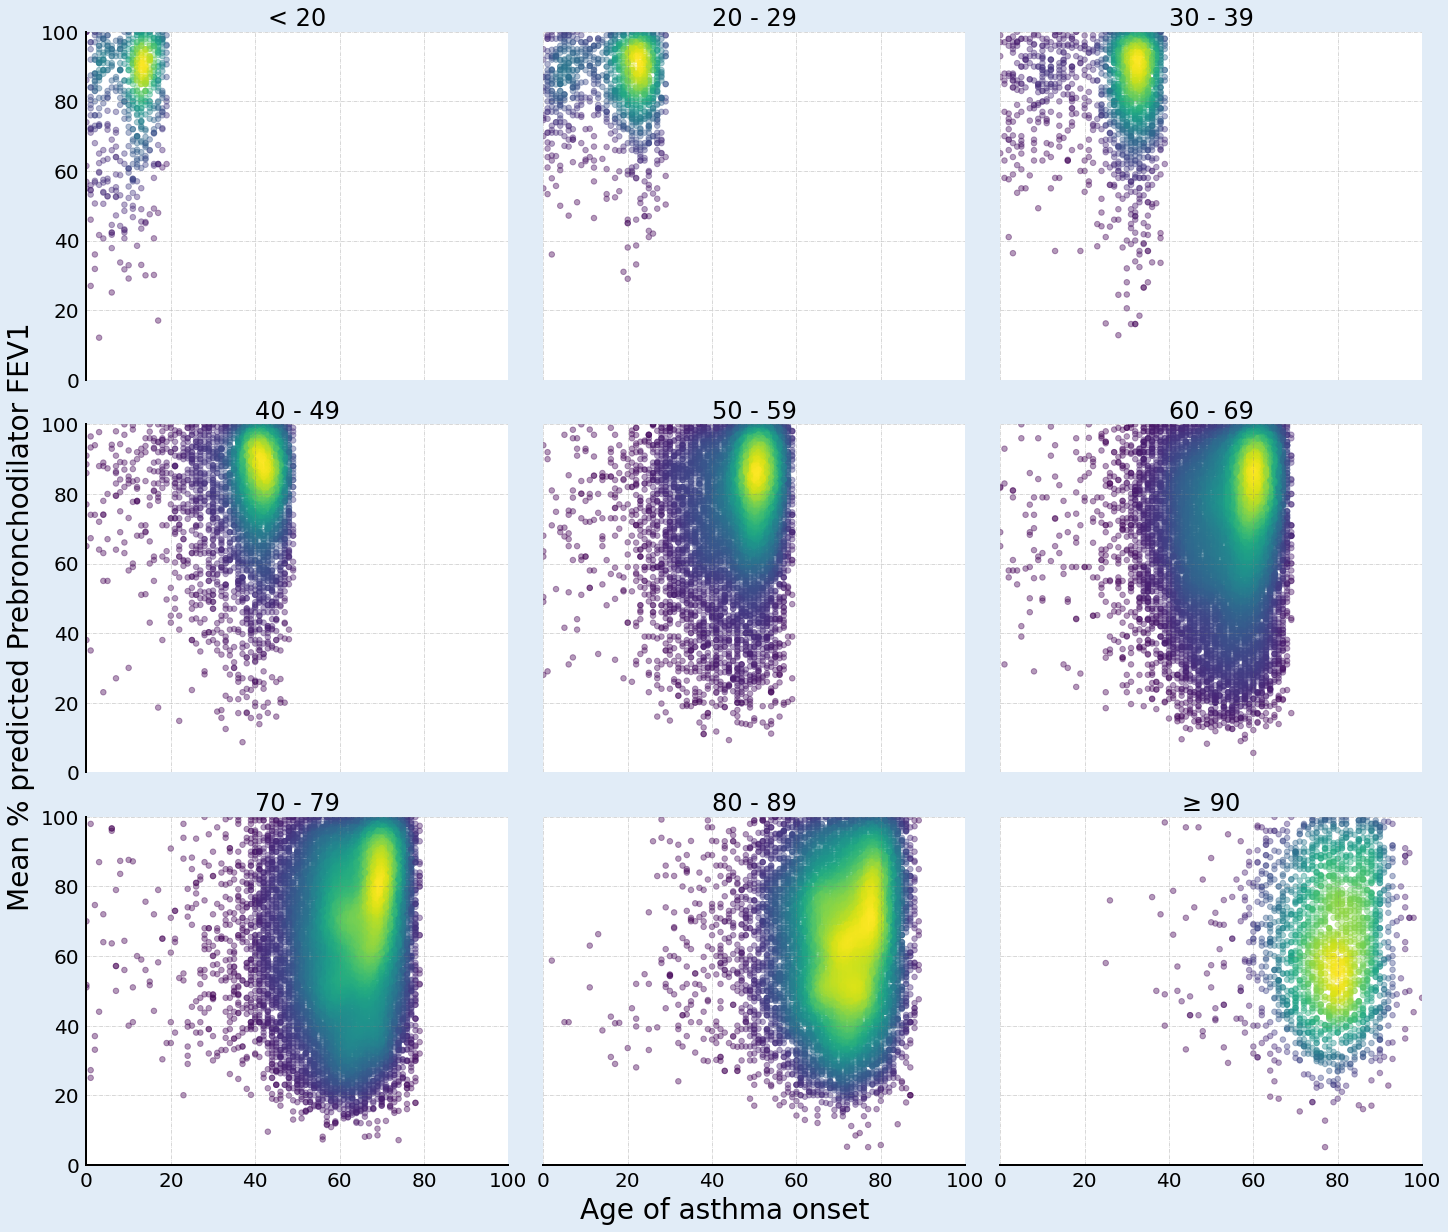

In [25]:
age_group = [0, 20, 30, 40, 50, 60, 70, 80, 90, 999]

# Creating histogram
fig, ax = plt.subplots(3, 3, figsize =(20, 17), layout='constrained', facecolor='#e1ecf7')

# Setting Font size
plt.rcParams.update({'font.size': 20})

# Creating histogram
age_idx = 0
for i in range(0,3):
    for j in range(0,3):
        tmp = lung_df[lung_df['age'] >= age_group[age_idx]]
        tmp = tmp[tmp['age'] < age_group[age_idx + 1]]
        
        x = tmp['asthma_qof_age_of_onset']
        y =  tmp['fev1_perc_pred']

        # Calculate the point density
        xy = np.vstack([x,y])
        z = gaussian_kde(xy)(xy)
        
        ax[i, j].scatter(x, y, c = z, alpha=0.4, s = 30)     
        ax[i, j].grid(visible = True, color ='grey', linestyle = '-.', linewidth = 0.6, alpha = 0.5)
        ax[i, j].set_ylim([0, 100])
        ax[i, j].set_xlim([0, 100])
        
        # Remove axes splines
        for s in ['top', 'bottom', 'left', 'right']:
            ax[i, j].spines[s].set_linewidth(2)
            if i == 2:
                if s == 'bottom':
                    continue
            if j == 0:
                if s == 'left':
                    continue                    
            ax[i, j].spines[s].set_visible(False)
                
        ax[i, j].xaxis.set_ticks_position('none')
        ax[i, j].yaxis.set_ticks_position('none')    
        
        title = str(age_group[age_idx]) + " - " +str(age_group[age_idx + 1] - 1)
        ax[i, j].set_title(title)
        age_idx += 1
        
# Adding Labels and Layout
fig.supxlabel('Age of asthma onset', fontsize = 28)
fig.supylabel('Mean % predicted Prebronchodilator FEV1', fontsize = 28)
ax[0, 0].set_title('< 20')
ax[2, 2].set_title('≥ 90')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for axs in ax.flat:
    axs.label_outer()

#plt.savefig("Result/2_mean_gp_density.png")    
plt.show()

0 - 19: 
Description: 
	 N =  650
	 Mean =  10.6338
	 SD =  5.0789
Linear regression result: 
	 Slope: 0.5228636106821487
	 Intercept: 75.2896718814846
	 R-squared: 0.025814325492033968
	 p-value: 3.86952920712555e-05
	 Standard Error: 0.12618025283523263


20 - 29: 
Description: 
	 N =  1227
	 Mean =  17.5640
	 SD =  8.0472
Linear regression result: 
	 Slope: 0.0016762887952561202
	 Intercept: 84.68140529761487
	 R-squared: 1.3163769772845336e-06
	 p-value: 0.9679747082179821
	 Standard Error: 0.04174364542537921
***


30 - 39: 
Description: 
	 N =  1794
	 Mean =  28.2380
	 SD =  8.9523
Linear regression result: 
	 Slope: 0.00376129902821245
	 Intercept: 82.6384985242641
	 R-squared: 5.7148135439655765e-06
	 p-value: 0.9194047261476499
	 Standard Error: 0.03716777689009473
***


40 - 49: 
Description: 
	 N =  3800
	 Mean =  38.0645
	 SD =  8.1839
Linear regression result: 
	 Slope: 0.0936953813521665
	 Intercept: 75.47629778008313
	 R-squared: 0.002186930661290984
	 p-value: 0.0039341

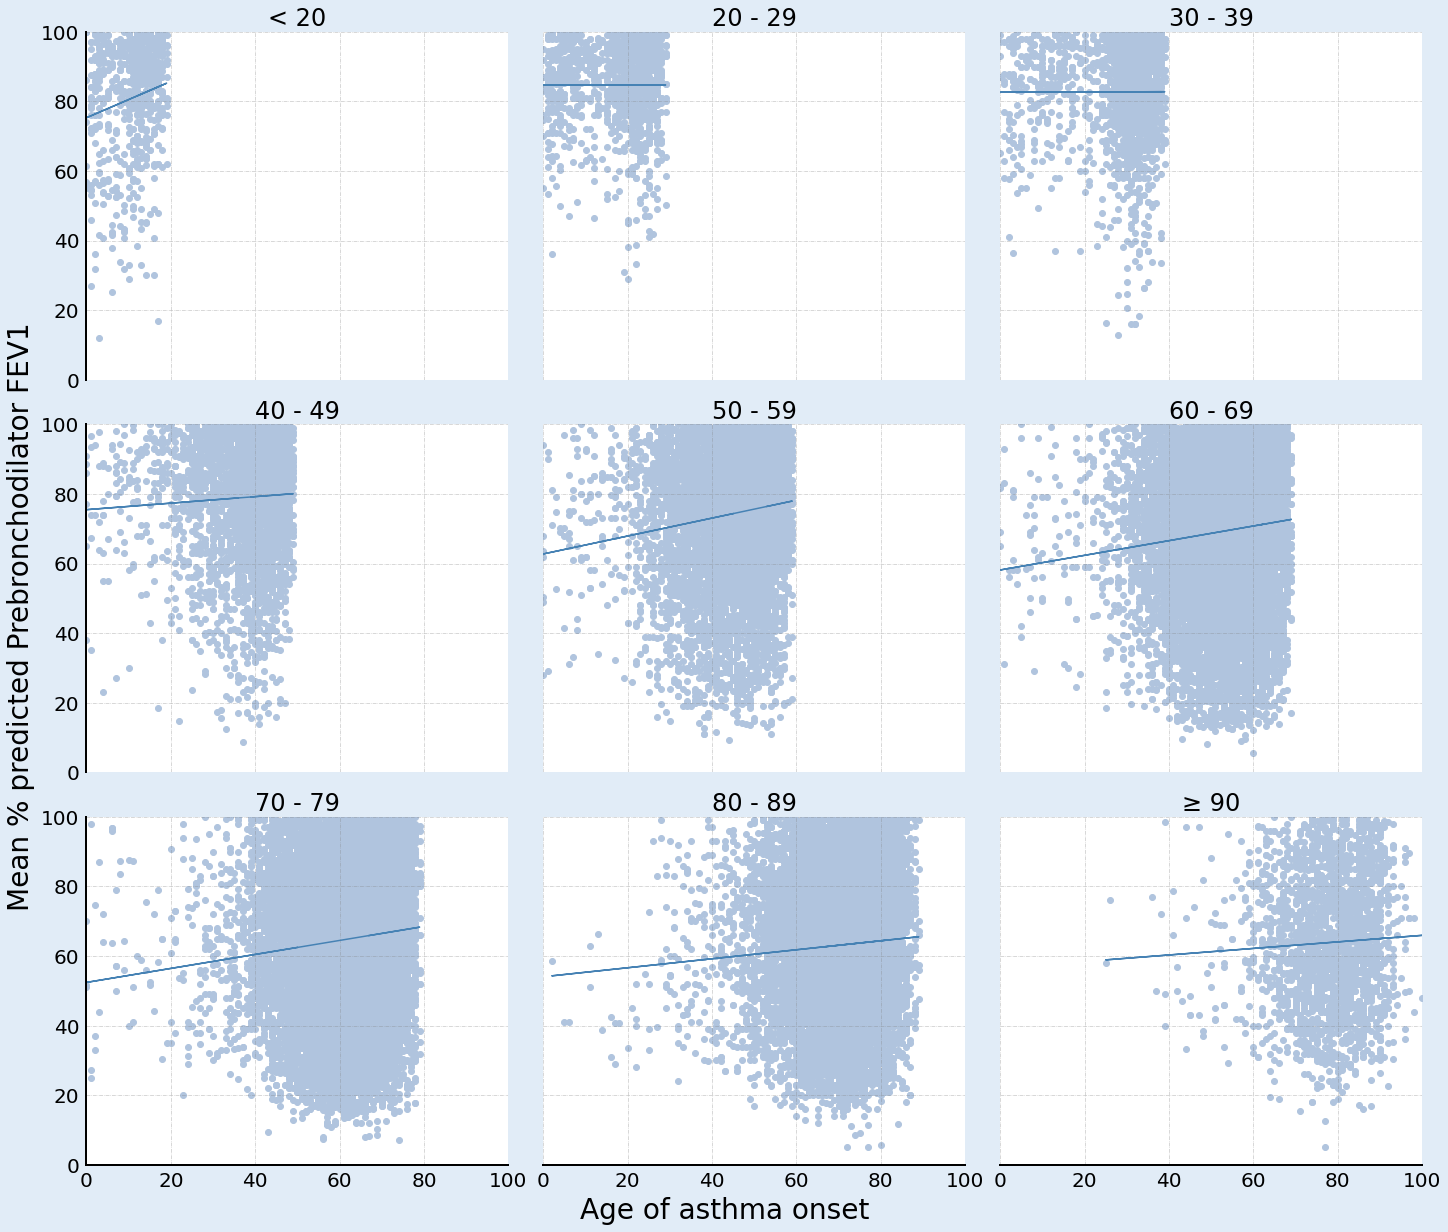

In [26]:
age_group = [0, 20, 30, 40, 50, 60, 70, 80, 90, 999]

# Creating histogram
fig, ax = plt.subplots(3, 3, figsize =(20, 17), layout='constrained', facecolor='#e1ecf7')

# Setting Font size
plt.rcParams.update({'font.size': 20})

# Creating histogram
age_idx = 0
for i in range(0,3):
    for j in range(0,3):
        tmp = lung_df[lung_df['age'] >= age_group[age_idx]]
        tmp = tmp[tmp['age'] < age_group[age_idx + 1]]
        
        x = tmp['asthma_qof_age_of_onset']
        y =  tmp['fev1_perc_pred']

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        
        ax[i, j].scatter(x, y, color='lightsteelblue', label='Data')
        ax[i, j].plot(x, intercept + slope * x, color='steelblue', label='Linear Regression')
        ax[i, j].set_ylim([0, 100])
        ax[i, j].set_xlim([0, 100])
        
        ax[i, j].grid(visible = True, color ='grey', linestyle = '-.', linewidth = 0.6, alpha = 0.5)
        
        # Remove axes splines
        for s in ['top', 'bottom', 'left', 'right']:
            ax[i, j].spines[s].set_linewidth(2)
            if i == 2:
                if s == 'bottom':
                    continue
            if j == 0:
                if s == 'left':
                    continue                    
            ax[i, j].spines[s].set_visible(False)
                
        ax[i, j].xaxis.set_ticks_position('none')
        ax[i, j].yaxis.set_ticks_position('none')    
        
        title = str(age_group[age_idx]) + " - " +str(age_group[age_idx + 1] - 1)
        ax[i, j].set_title(title)
        
        # Print regression results
        print(title + ": ")
        print("Description: ")
        print('\t N = ', "{:.0f}".format(tmp['asthma_qof_age_of_onset'].describe()[0]))
        print('\t Mean = ', "{:.4f}".format(tmp['asthma_qof_age_of_onset'].describe()[1]))
        print('\t SD = ', "{:.4f}".format(tmp['asthma_qof_age_of_onset'].describe()[2]))
        print("Linear regression result: ")
        print("\t Slope:", slope)
        print("\t Intercept:", intercept)
        print("\t R-squared:", r_value ** 2)
        print("\t p-value:", p_value)
        print("\t Standard Error:", std_err)
        if p_value > 0.05:
            print("***")
        print('\n')
        
        age_idx += 1
        
# Adding Labels and Layout
fig.supxlabel('Age of asthma onset', fontsize = 28)
fig.supylabel('Mean % predicted Prebronchodilator FEV1', fontsize = 28)
ax[0, 0].set_title('< 20')
ax[2, 2].set_title('≥ 90')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for axs in ax.flat:
    axs.label_outer()

#plt.savefig("Result/2_mean_gp_regresion.png")    
plt.show()

#### Distribution of age of onset and Percentage predicted Prebronchodilator FEV1 >80% (yes/no) (overall)

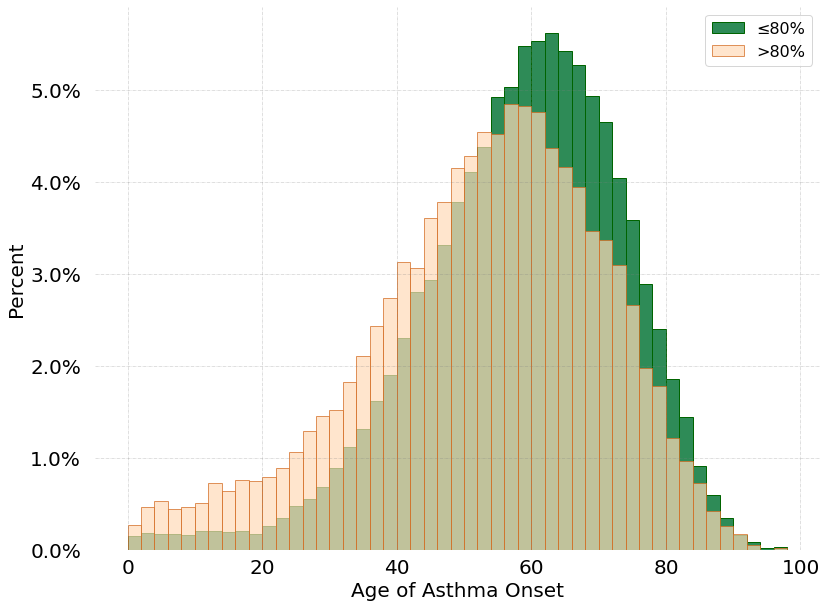

In [27]:
# Creating histogram
fig, ax = plt.subplots(1, 1, figsize =(13, 10))

# Setting Font size
plt.rcParams.update({'font.size': 16})

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')    

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(visible = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.5)

# Creating histogram
no = lung_df[lung_df['percent>80'] == 0]
yes = lung_df[lung_df['percent>80'] == 1]

plt.hist(no['asthma_qof_age_of_onset'], bins = np.arange(0, 100, 2), color = "seagreen", label='≤80%', edgecolor = "darkgreen", 
        weights = np.ones(len(no['asthma_qof_age_of_onset'])) / len(no['asthma_qof_age_of_onset']))
plt.hist(yes['asthma_qof_age_of_onset'], bins = np.arange(0, 100, 2), color = "peachpuff", label='>80%', edgecolor = "chocolate", alpha = 0.7,
        weights = np.ones(len(yes['asthma_qof_age_of_onset'])) / len(yes['asthma_qof_age_of_onset']))

# Adding Labels
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(loc='upper right')
ax.set_xlabel('Age of Asthma Onset')
ax.set_ylabel('Percent')

#plt.savefig("Result/2_percent_all.png")    
plt.show()

In [28]:
print("Percentage predicted Prebronchodilator FEV1 >80%: ")
print('\t N = ', "{:.0f}".format(yes['asthma_qof_age_of_onset'].describe()[0]))
print('\t Mean = ', "{:.4f}".format(yes['asthma_qof_age_of_onset'].describe()[1]))
print('\t SD = ', "{:.4f}".format(yes['asthma_qof_age_of_onset'].describe()[2]))

print("Percentage predicted Prebronchodilator FEV1 ≤80%: ")
print('\t N = ', "{:.0f}".format(no['asthma_qof_age_of_onset'].describe()[0]))
print('\t Mean = ', "{:.4f}".format(no['asthma_qof_age_of_onset'].describe()[1]))
print('\t SD = ', "{:.4f}".format(no['asthma_qof_age_of_onset'].describe()[2]))

Percentage predicted Prebronchodilator FEV1 >80%: 
	 N =  21063
	 Mean =  52.3150
	 SD =  17.7706
Percentage predicted Prebronchodilator FEV1 ≤80%: 
	 N =  38927
	 Mean =  57.9171
	 SD =  15.2026


In [29]:
# Anderson-Darling test (test normality)
result = stats.anderson(yes['asthma_qof_age_of_onset'])

# Print the results
print(">80% Anderson-Darling Test:")
print("\t Statistic:", result.statistic)
print("\t Critical Values:", result.critical_values)
print("\t Significance Levels:", result.significance_level)

# Compare the test statistic with critical values to determine normality
if result.statistic < result.critical_values[2]:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis)")

print("\n")   
    
result = stats.anderson(no['asthma_qof_age_of_onset'])

# Print the results
print("≤80% Anderson-Darling Test:")
print("\t Statistic:", result.statistic)
print("\t Critical Values:", result.critical_values)
print("\t Significance Levels:", result.significance_level)

# Compare the test statistic with critical values to determine normality
if result.statistic < result.critical_values[2]:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis)")

>80% Anderson-Darling Test:
	 Statistic: 108.93199341452782
	 Critical Values: [0.576 0.656 0.787 0.918 1.092]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)


≤80% Anderson-Darling Test:
	 Statistic: 178.87405550917902
	 Critical Values: [0.576 0.656 0.787 0.918 1.092]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)


In [30]:
# Mann-Whitney U Test
statistic, p_value = stats.mannwhitneyu(no['asthma_qof_age_of_onset'], yes['asthma_qof_age_of_onset'])

# Print the results
print("Mann-Whitney U Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

# Check the significance level to determine if there is a significant difference
alpha = 0.05
if p_value > alpha:
    print("There is no significant difference in age of asthma onset between genders (fail to reject the null hypothesis)")
else:
    print("There is a significant difference in age of asthma onset between genders (reject the null hypothesis)")

Mann-Whitney U Test:
Statistic: 484741648.5
p-value: 9.130850182728398e-299
There is a significant difference in age of asthma onset between genders (reject the null hypothesis)


#### Distribution of age of onset and Percentage predicted Prebronchodilator FEV1 >80% (yes/no) (by age group)

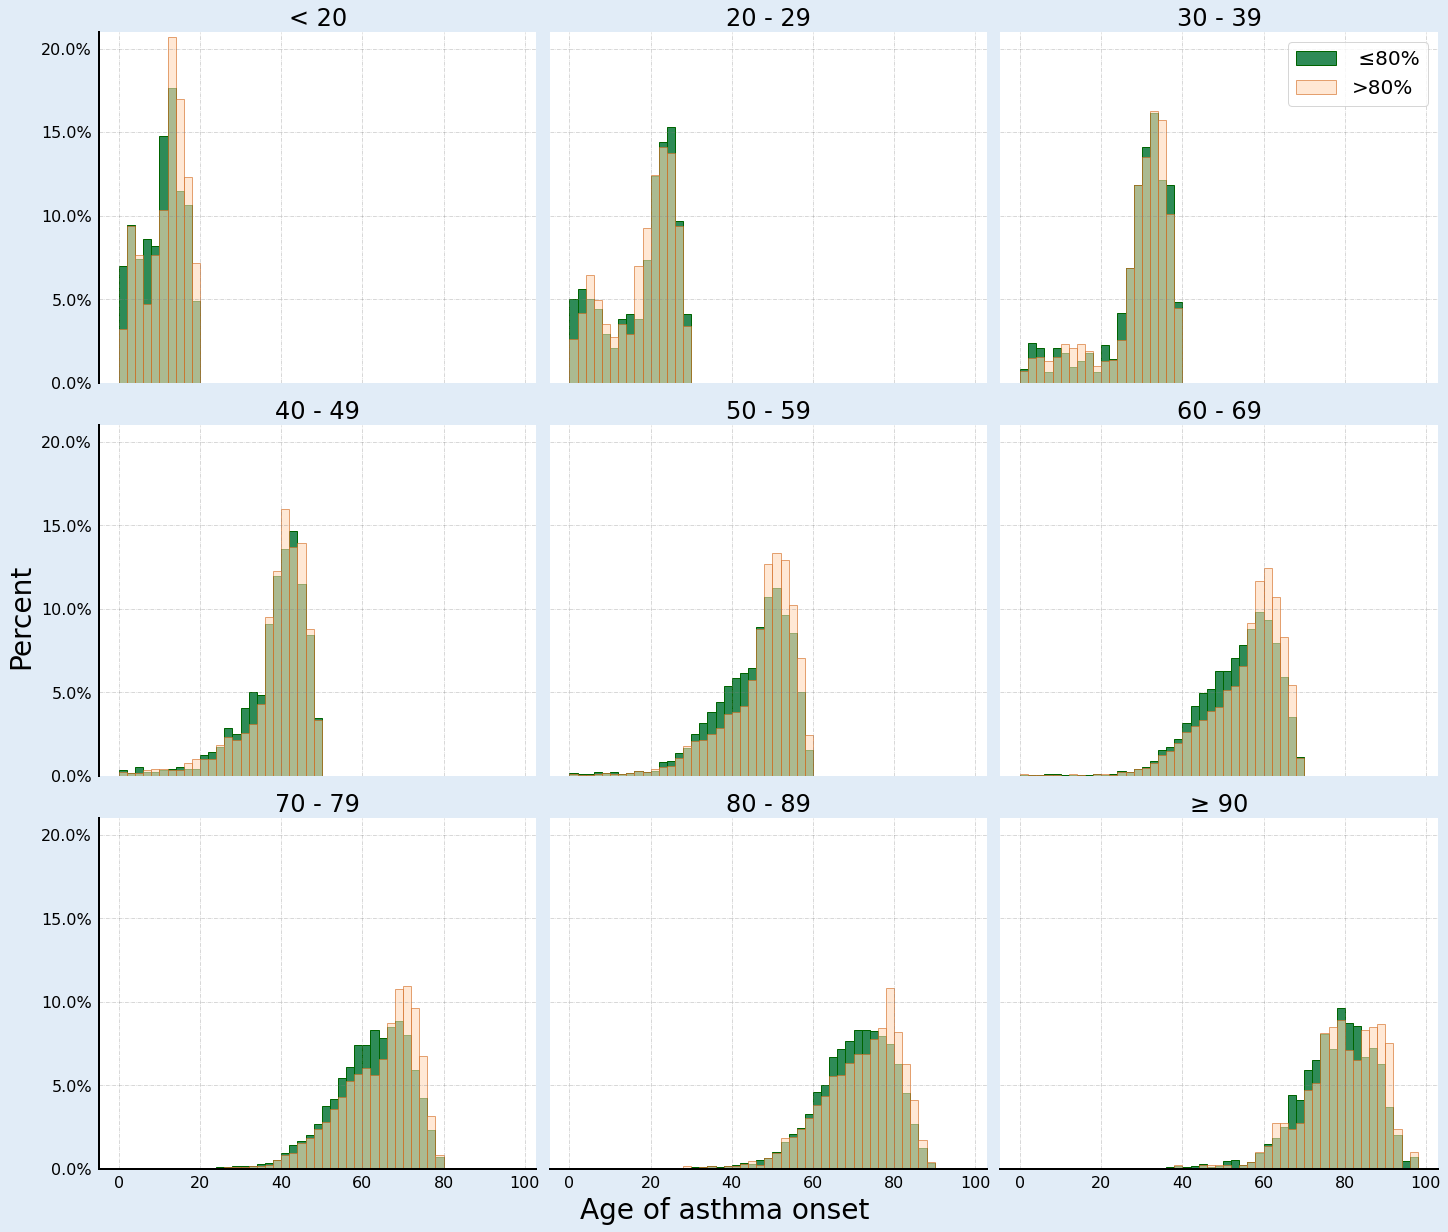

In [31]:
age_group = [0, 20, 30, 40, 50, 60, 70, 80, 90, 999]

# Creating histogram
fig, ax = plt.subplots(3, 3, figsize =(20, 17), layout='constrained', facecolor='#e1ecf7')

# Setting Font size
plt.rcParams.update({'font.size': 20})

# Creating histogram
age_idx = 0
for i in range(0,3):
    for j in range(0,3):
        tmp = lung_df[lung_df['age'] >= age_group[age_idx]]
        tmp = tmp[tmp['age'] < age_group[age_idx + 1]]

        
        no = tmp[tmp['percent>80'] == 0]
        yes = tmp[tmp['percent>80'] == 1]

        ax[i, j].hist(no['asthma_qof_age_of_onset'], bins = np.arange(0, 100, 2), color = "seagreen", label=' ≤80%', edgecolor = "darkgreen", 
                 weights = np.ones(len(no['asthma_qof_age_of_onset'])) / len(no['asthma_qof_age_of_onset']))
        ax[i, j].hist(yes['asthma_qof_age_of_onset'], bins = np.arange(0, 100, 2), color = "peachpuff", label='>80%', edgecolor = "chocolate", alpha = 0.6,
                 weights = np.ones(len(yes['asthma_qof_age_of_onset'])) / len(yes['asthma_qof_age_of_onset']))

        
        
        ax[i, j].set_ylim([0, 0.21])
        ax[i, j].yaxis.set_major_formatter(PercentFormatter(1))
        ax[i, j].grid(visible = True, color ='grey', linestyle = '-.', linewidth = 0.6, alpha = 0.5)
        
        # Remove axes splines
        for s in ['top', 'bottom', 'left', 'right']:
            ax[i, j].spines[s].set_linewidth(2)
            if i == 2:
                if s == 'bottom':
                    continue
            if j == 0:
                if s == 'left':
                    continue                    
            ax[i, j].spines[s].set_visible(False)
                
        ax[i, j].xaxis.set_ticks_position('none')
        ax[i, j].yaxis.set_ticks_position('none')    
        
        title = str(age_group[age_idx]) + " - " +str(age_group[age_idx + 1] - 1)
        ax[i, j].set_title(title)
        age_idx += 1
        
# Adding Labels and Layout
fig.supxlabel('Age of asthma onset', fontsize = 28)
fig.supylabel('Percent', fontsize = 28)
ax[0, 0].set_title('< 20')
ax[2, 2].set_title('≥ 90')
ax[0, 2].legend()

# Hide x labels and tick labels for top plots and y ticks for right plots.
for axs in ax.flat:
    axs.label_outer()

#plt.savefig("Result/2_percent_gp.png")
plt.show()

In [32]:
age_group = [0, 20, 30, 40, 50, 60, 70, 80, 90, 999]

for k in range(0,9):
    tmp = lung_df[lung_df['age'] >= age_group[k]]
    tmp = tmp[tmp['age'] < age_group[k + 1]]
    no = tmp[tmp['percent>80'] == 0]
    yes = tmp[tmp['percent>80'] == 1]
    
    des = str(age_group[k]) + " - " +str(age_group[k + 1] - 1)
    if k == 0:
        des = '< 20'
    if k == 8:
        des = '≥ 90'
    
    print(des)
    print("Percentage predicted Prebronchodilator FEV1 ≤80%: ")
    print('\t N = ', "{:.0f}".format(no['asthma_qof_age_of_onset'].describe()[0]))
    print('\t Mean = ', "{:.4f}".format(no['asthma_qof_age_of_onset'].describe()[1]))
    print('\t SD = ', "{:.4f}".format(no['asthma_qof_age_of_onset'].describe()[2]))

    print("Percentage predicted Prebronchodilator FEV1 >80%: ")
    print('\t N = ', "{:.0f}".format(yes['asthma_qof_age_of_onset'].describe()[0]))
    print('\t Mean = ', "{:.4f}".format(yes['asthma_qof_age_of_onset'].describe()[1]))
    print('\t SD = ', "{:.4f}".format(yes['asthma_qof_age_of_onset'].describe()[2]))
    print('\n')

< 20
Percentage predicted Prebronchodilator FEV1 ≤80%: 
	 N =  244
	 Mean =  9.9713
	 SD =  5.1179
Percentage predicted Prebronchodilator FEV1 >80%: 
	 N =  406
	 Mean =  11.0320
	 SD =  5.0196


20 - 29
Percentage predicted Prebronchodilator FEV1 ≤80%: 
	 N =  340
	 Mean =  17.5324
	 SD =  8.4690
Percentage predicted Prebronchodilator FEV1 >80%: 
	 N =  887
	 Mean =  17.5761
	 SD =  7.8844


30 - 39
Percentage predicted Prebronchodilator FEV1 ≤80%: 
	 N =  625
	 Mean =  28.1776
	 SD =  9.0610
Percentage predicted Prebronchodilator FEV1 >80%: 
	 N =  1169
	 Mean =  28.2703
	 SD =  8.8974


40 - 49
Percentage predicted Prebronchodilator FEV1 ≤80%: 
	 N =  1649
	 Mean =  37.7386
	 SD =  8.3261
Percentage predicted Prebronchodilator FEV1 >80%: 
	 N =  2151
	 Mean =  38.3143
	 SD =  8.0662


50 - 59
Percentage predicted Prebronchodilator FEV1 ≤80%: 
	 N =  4470
	 Mean =  44.5242
	 SD =  9.4157
Percentage predicted Prebronchodilator FEV1 >80%: 
	 N =  3705
	 Mean =  46.5177
	 SD =  8.8666



In [33]:
for k in range(0,9):
    tmp = lung_df[lung_df['age'] >= age_group[k]]
    tmp = tmp[tmp['age'] < age_group[k + 1]]
    no = tmp[tmp['percent>80'] == 0]
    yes = tmp[tmp['percent>80'] == 1]
    
    des = str(age_group[k]) + " - " +str(age_group[k + 1] - 1)
    if k == 0:
        des = '< 20'
    if k == 8:
        des = '≥ 90'
    
    print(des)
    
    # Anderson-Darling test (test normality)
    result = stats.anderson(yes['asthma_qof_age_of_onset'])

    # Print the results
    print(">80% Anderson-Darling Test:")
    print("\t Statistic:", result.statistic)
    print("\t Critical Values:", result.critical_values)
    print("\t Significance Levels:", result.significance_level)

    # Compare the test statistic with critical values to determine normality
    if result.statistic < result.critical_values[2]:
        print("The data follows a normal distribution (fail to reject the null hypothesis)")
    else:
        print("The data does not follow a normal distribution (reject the null hypothesis)")


    result = stats.anderson(no['asthma_qof_age_of_onset'])

    # Print the results
    print("≤80% Anderson-Darling Test:")
    print("\t Statistic:", result.statistic)
    print("\t Critical Values:", result.critical_values)
    print("\t Significance Levels:", result.significance_level)

    # Compare the test statistic with critical values to determine normality
    if result.statistic < result.critical_values[2]:
        print("The data follows a normal distribution (fail to reject the null hypothesis)")
    else:
        print("The data does not follow a normal distribution (reject the null hypothesis)")
    
    print("\n")

< 20
>80% Anderson-Darling Test:
	 Statistic: 8.943960383648175
	 Critical Values: [0.57  0.65  0.779 0.909 1.082]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)
≤80% Anderson-Darling Test:
	 Statistic: 3.2435839634367767
	 Critical Values: [0.567 0.646 0.775 0.904 1.075]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)


20 - 29
>80% Anderson-Darling Test:
	 Statistic: 32.10409816997742
	 Critical Values: [0.573 0.653 0.783 0.914 1.087]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)
≤80% Anderson-Darling Test:
	 Statistic: 14.666230642468122
	 Critical Values: [0.569 0.649 0.778 0.908 1.08 ]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)


30 - 39
>80% Anderson-Darling Test:
	

In [34]:
for k in range(0,9):
    tmp = lung_df[lung_df['age'] >= age_group[k]]
    tmp = tmp[tmp['age'] < age_group[k + 1]]
    no = tmp[tmp['percent>80'] == 0]
    yes = tmp[tmp['percent>80'] == 1]
    
    des = str(age_group[k]) + " - " +str(age_group[k + 1] - 1)
    if k == 0:
        des = '< 20'
    if k == 8:
        des = '≥ 90'
    
    print(des)

    # Mann-Whitney U Test
    statistic, p_value = stats.mannwhitneyu(no['asthma_qof_age_of_onset'], yes['asthma_qof_age_of_onset'])

    # Print the results
    print("Mann-Whitney U Test:")
    print("Statistic:", statistic)
    print("p-value:", "{:.5}".format(p_value))

    # Check the significance level to determine if there is a significant difference
    alpha = 0.05
    if p_value > alpha:
        print("There is no significant difference in age of asthma onset between genders (fail to reject the null hypothesis)")
    else:
        print("There is a significant difference in age of asthma onset between genders (reject the null hypothesis)")
    print('\n')

< 20
Mann-Whitney U Test:
Statistic: 43072.0
p-value: 0.0052314
There is a significant difference in age of asthma onset between genders (reject the null hypothesis)


20 - 29
Mann-Whitney U Test:
Statistic: 153467.5
p-value: 0.62945
There is no significant difference in age of asthma onset between genders (fail to reject the null hypothesis)


30 - 39
Mann-Whitney U Test:
Statistic: 361574.5
p-value: 0.72025
There is no significant difference in age of asthma onset between genders (fail to reject the null hypothesis)


40 - 49
Mann-Whitney U Test:
Statistic: 1690555.0
p-value: 0.013202
There is a significant difference in age of asthma onset between genders (reject the null hypothesis)


50 - 59
Mann-Whitney U Test:
Statistic: 7115076.5
p-value: 4.616e-28
There is a significant difference in age of asthma onset between genders (reject the null hypothesis)


60 - 69
Mann-Whitney U Test:
Statistic: 18930910.0
p-value: 1.97e-41
There is a significant difference in age of asthma onset bet

#### Distribution of age of onset and FEV1/FVC <0.8 (yes/no) (overall)

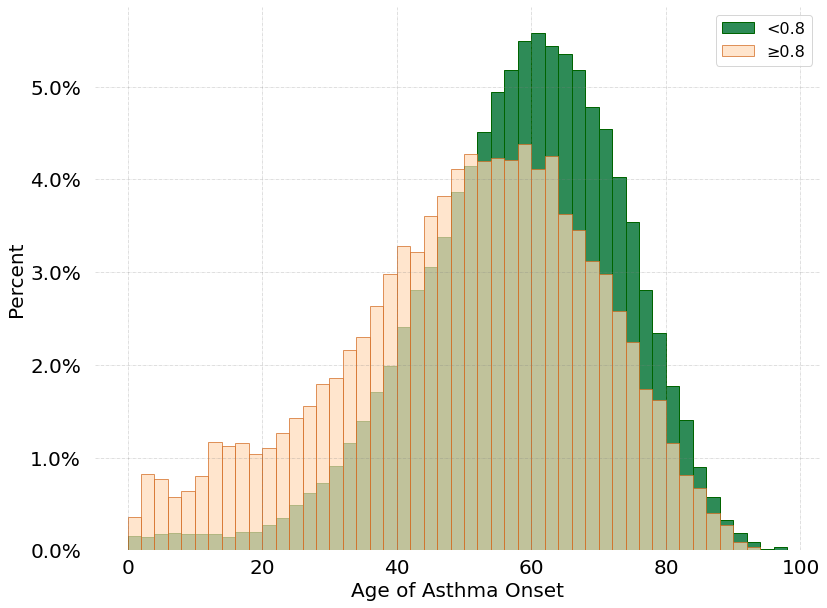

In [35]:
# Creating histogram
fig, ax = plt.subplots(1, 1, figsize =(13, 10))

# Setting Font size
plt.rcParams.update({'font.size': 16})

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')    

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(visible = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.5)

# Creating histogram
no = lung_df[lung_df['ratio>80'] == 0]
yes = lung_df[lung_df['ratio>80'] == 1]

plt.hist(no['asthma_qof_age_of_onset'], bins = np.arange(0, 100, 2), color = "seagreen", label='<0.8', edgecolor = "darkgreen", 
        weights = np.ones(len(no['asthma_qof_age_of_onset'])) / len(no['asthma_qof_age_of_onset']))
plt.hist(yes['asthma_qof_age_of_onset'], bins = np.arange(0, 100, 2), color = "peachpuff", label='≥0.8', edgecolor = "chocolate", alpha = 0.7,
        weights = np.ones(len(yes['asthma_qof_age_of_onset'])) / len(yes['asthma_qof_age_of_onset']))

# Adding Labels
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(loc='upper right')
ax.set_xlabel('Age of Asthma Onset')
ax.set_ylabel('Percent')

#plt.savefig("Result/2_ratio_all.png")
plt.show()

In [36]:
print("FEV1/FVC < 0.8: ")
print('\t N = ', "{:.0f}".format(no['asthma_qof_age_of_onset'].describe()[0]))
print('\t Mean = ', "{:.4f}".format(no['asthma_qof_age_of_onset'].describe()[1]))
print('\t SD = ', "{:.4f}".format(no['asthma_qof_age_of_onset'].describe()[2]))

print("FEV1/FVC ≥ 0.8: ")
print('\t N = ', "{:.0f}".format(yes['asthma_qof_age_of_onset'].describe()[0]))
print('\t Mean = ', "{:.4f}".format(yes['asthma_qof_age_of_onset'].describe()[1]))
print('\t SD = ', "{:.4f}".format(yes['asthma_qof_age_of_onset'].describe()[2]))

FEV1/FVC < 0.8: 
	 N =  47013
	 Mean =  57.7052
	 SD =  15.1214
FEV1/FVC ≥ 0.8: 
	 N =  12977
	 Mean =  49.5918
	 SD =  18.9460


In [37]:
# Anderson-Darling test (test normality)
result = stats.anderson(yes['asthma_qof_age_of_onset'])

# Print the results
print(">80% Anderson-Darling Test:")
print("\t Statistic:", result.statistic)
print("\t Critical Values:", result.critical_values)
print("\t Significance Levels:", result.significance_level)

# Compare the test statistic with critical values to determine normality
if result.statistic < result.critical_values[2]:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis)")

print("\n")   
    
result = stats.anderson(no['asthma_qof_age_of_onset'])

# Print the results
print("≤80% Anderson-Darling Test:")
print("\t Statistic:", result.statistic)
print("\t Critical Values:", result.critical_values)
print("\t Significance Levels:", result.significance_level)

# Compare the test statistic with critical values to determine normality
if result.statistic < result.critical_values[2]:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis)")

>80% Anderson-Darling Test:
	 Statistic: 66.71964852327073
	 Critical Values: [0.576 0.656 0.787 0.918 1.092]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)


≤80% Anderson-Darling Test:
	 Statistic: 184.41193354781717
	 Critical Values: [0.576 0.656 0.787 0.918 1.092]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)


In [38]:
# Mann-Whitney U Test
statistic, p_value = stats.mannwhitneyu(no['asthma_qof_age_of_onset'], yes['asthma_qof_age_of_onset'])

# Print the results
print("Mann-Whitney U Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

# Check the significance level to determine if there is a significant difference
alpha = 0.05
if p_value > alpha:
    print("There is no significant difference in age of asthma onset between genders (fail to reject the null hypothesis)")
else:
    print("There is a significant difference in age of asthma onset between genders (reject the null hypothesis)")

Mann-Whitney U Test:
Statistic: 381069840.0
p-value: 0.0
There is a significant difference in age of asthma onset between genders (reject the null hypothesis)


#### Distribution of age of onset and FEV1/FVC <0.8 (yes/no) (by age group)

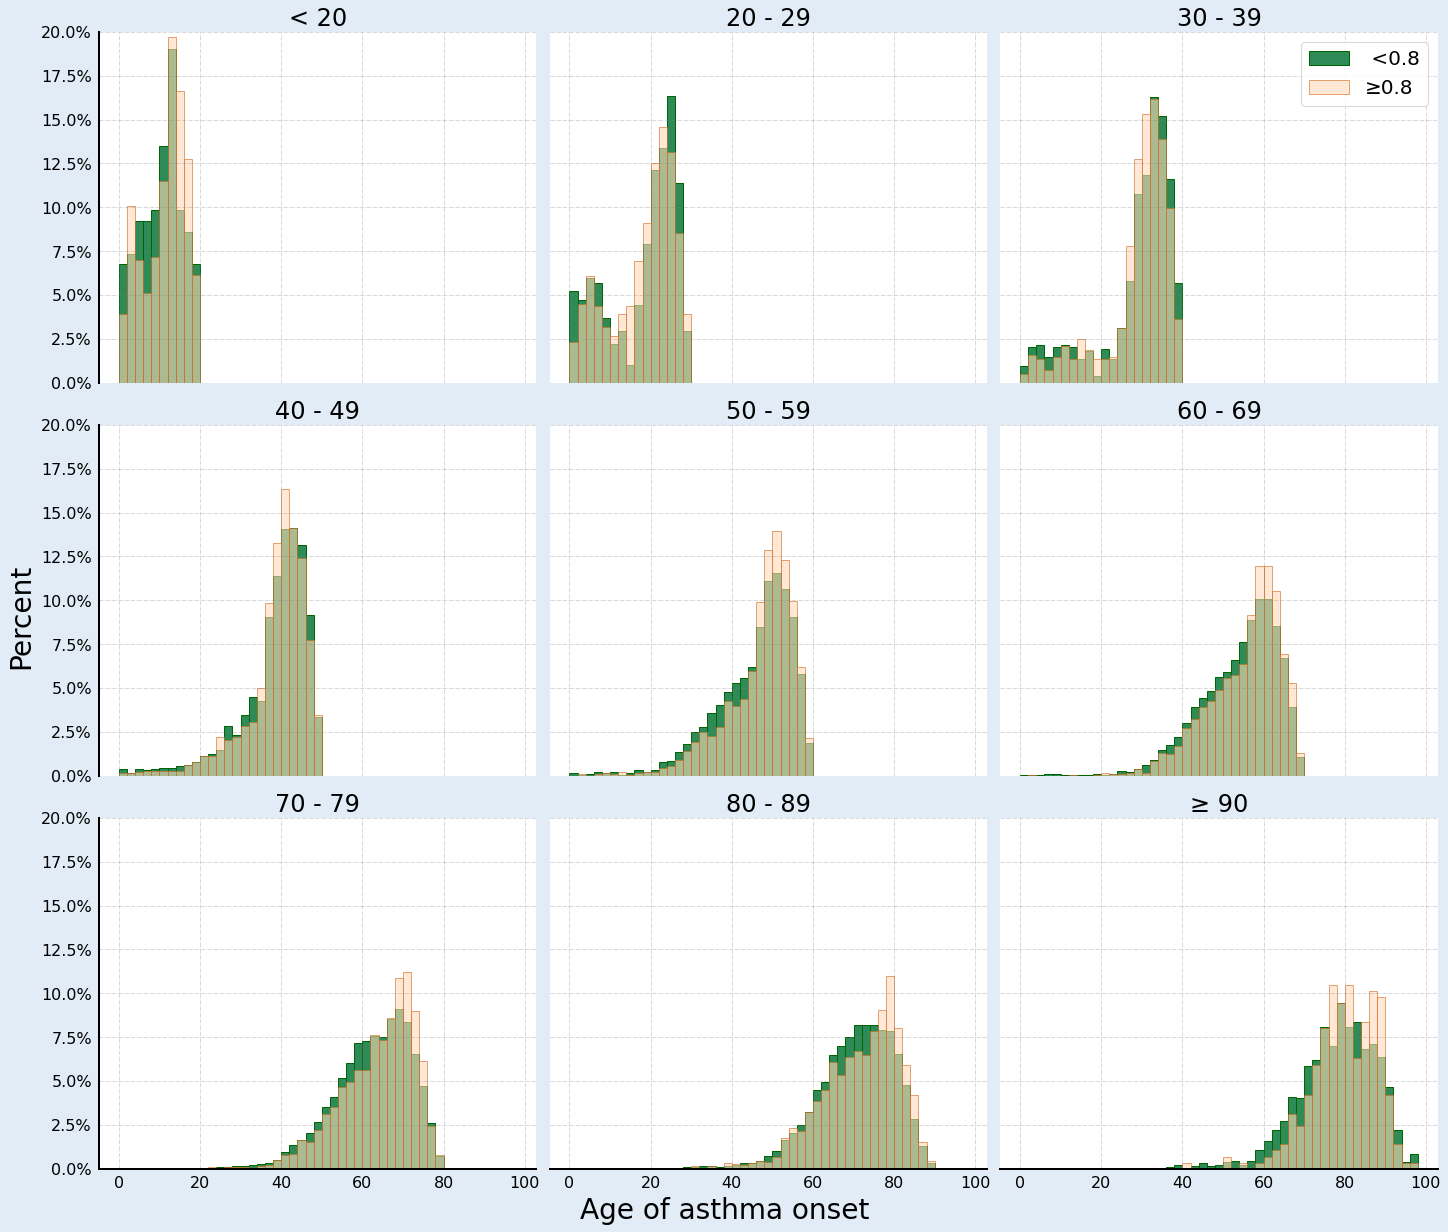

In [39]:
age_group = [0, 20, 30, 40, 50, 60, 70, 80, 90, 999]

# Creating histogram
fig, ax = plt.subplots(3, 3, figsize =(20, 17), layout='constrained', facecolor='#e1ecf7')

# Setting Font size
plt.rcParams.update({'font.size': 20})

# Creating histogram
age_idx = 0
for i in range(0,3):
    for j in range(0,3):
        tmp = lung_df[lung_df['age'] >= age_group[age_idx]]
        tmp = tmp[tmp['age'] < age_group[age_idx + 1]]

        
        no = tmp[tmp['ratio>80'] == 0]
        yes = tmp[tmp['ratio>80'] == 1]

        ax[i, j].hist(no['asthma_qof_age_of_onset'], bins = np.arange(0, 100, 2), color = "seagreen", label=' <0.8', edgecolor = "darkgreen", 
                 weights = np.ones(len(no['asthma_qof_age_of_onset'])) / len(no['asthma_qof_age_of_onset']))
        ax[i, j].hist(yes['asthma_qof_age_of_onset'], bins = np.arange(0, 100, 2), color = "peachpuff", label='≥0.8', edgecolor = "chocolate", alpha = 0.6,
                 weights = np.ones(len(yes['asthma_qof_age_of_onset'])) / len(yes['asthma_qof_age_of_onset']))

        
        
        ax[i, j].set_ylim([0, 0.20])
        ax[i, j].yaxis.set_major_formatter(PercentFormatter(1))
        ax[i, j].grid(visible = True, color ='grey', linestyle = '-.', linewidth = 0.6, alpha = 0.5)
        
        # Remove axes splines
        for s in ['top', 'bottom', 'left', 'right']:
            ax[i, j].spines[s].set_linewidth(2)
            if i == 2:
                if s == 'bottom':
                    continue
            if j == 0:
                if s == 'left':
                    continue                    
            ax[i, j].spines[s].set_visible(False)
                
        ax[i, j].xaxis.set_ticks_position('none')
        ax[i, j].yaxis.set_ticks_position('none')    
        
        title = str(age_group[age_idx]) + " - " +str(age_group[age_idx + 1] - 1)
        ax[i, j].set_title(title)
        age_idx += 1
        
# Adding Labels and Layout
fig.supxlabel('Age of asthma onset', fontsize = 28)
fig.supylabel('Percent', fontsize = 28)
ax[0, 0].set_title('< 20')
ax[2, 2].set_title('≥ 90')
ax[0, 2].legend()

# Hide x labels and tick labels for top plots and y ticks for right plots.
for axs in ax.flat:
    axs.label_outer()

#plt.savefig("Result/2_ratio_gp.png")
plt.show()

In [40]:
age_group = [0, 20, 30, 40, 50, 60, 70, 80, 90, 999]

for k in range(0,9):
    tmp = lung_df[lung_df['age'] >= age_group[k]]
    tmp = tmp[tmp['age'] < age_group[k + 1]]
    no = tmp[tmp['ratio>80'] == 0]
    yes = tmp[tmp['ratio>80'] == 1]
    
    des = str(age_group[k]) + " - " +str(age_group[k + 1] - 1)
    if k == 0:
        des = '< 20'
    if k == 8:
        des = '≥ 90'
    
    print(des)
    print("FEV1/FVC < 0.8: ")
    print('\t N = ', "{:.0f}".format(no['asthma_qof_age_of_onset'].describe()[0]))
    print('\t Mean = ', "{:.4f}".format(no['asthma_qof_age_of_onset'].describe()[1]))
    print('\t SD  ', "{:.4f}".format(no['asthma_qof_age_of_onset'].describe()[2]))
    
    print("FEV1/FVC ≥ 0.8: ")
    print('\t N = ', "{:.0f}".format(yes['asthma_qof_age_of_onset'].describe()[0]))
    print('\t Mean = ', "{:.4f}".format(yes['asthma_qof_age_of_onset'].describe()[1]))
    print('\t SD = ', "{:.4f}".format(yes['asthma_qof_age_of_onset'].describe()[2]))    
    print('\n')

< 20
FEV1/FVC < 0.8: 
	 N =  163
	 Mean =  9.9693
	 SD   5.0606
FEV1/FVC ≥ 0.8: 
	 N =  487
	 Mean =  10.8563
	 SD =  5.0707


20 - 29
FEV1/FVC < 0.8: 
	 N =  404
	 Mean =  17.4307
	 SD   8.5773
FEV1/FVC ≥ 0.8: 
	 N =  823
	 Mean =  17.6294
	 SD =  7.7783


30 - 39
FEV1/FVC < 0.8: 
	 N =  828
	 Mean =  28.0954
	 SD   9.5305
FEV1/FVC ≥ 0.8: 
	 N =  966
	 Mean =  28.3602
	 SD =  8.4282


40 - 49
FEV1/FVC < 0.8: 
	 N =  2344
	 Mean =  37.9160
	 SD   8.5021
FEV1/FVC ≥ 0.8: 
	 N =  1456
	 Mean =  38.3036
	 SD =  7.6406


50 - 59
FEV1/FVC < 0.8: 
	 N =  5963
	 Mean =  45.0225
	 SD   9.4589
FEV1/FVC ≥ 0.8: 
	 N =  2212
	 Mean =  46.5199
	 SD =  8.4643


60 - 69
FEV1/FVC < 0.8: 
	 N =  11017
	 Mean =  53.3144
	 SD   9.6963
FEV1/FVC ≥ 0.8: 
	 N =  2799
	 Mean =  54.8017
	 SD =  8.8359


70 - 79
FEV1/FVC < 0.8: 
	 N =  13961
	 Mean =  61.6390
	 SD   9.8971
FEV1/FVC ≥ 0.8: 
	 N =  2456
	 Mean =  63.2989
	 SD =  9.2273


80 - 89
FEV1/FVC < 0.8: 
	 N =  10422
	 Mean =  69.8322
	 SD   9.9077
FEV1/FV

In [41]:
for k in range(0,9):
    tmp = lung_df[lung_df['age'] >= age_group[k]]
    tmp = tmp[tmp['age'] < age_group[k + 1]]
    no = tmp[tmp['ratio>80'] == 0]
    yes = tmp[tmp['ratio>80'] == 1]
    
    des = str(age_group[k]) + " - " +str(age_group[k + 1] - 1)
    if k == 0:
        des = '< 20'
    if k == 8:
        des = '≥ 90'
    
    print(des)
    
    # Anderson-Darling test (test normality)
    result = stats.anderson(yes['asthma_qof_age_of_onset'])

    # Print the results
    print(" ≥ 0.8 Anderson-Darling Test:")
    print("\t Statistic:", result.statistic)
    print("\t Critical Values:", result.critical_values)
    print("\t Significance Levels:", result.significance_level)

    # Compare the test statistic with critical values to determine normality
    if result.statistic < result.critical_values[2]:
        print("The data follows a normal distribution (fail to reject the null hypothesis)")
    else:
        print("The data does not follow a normal distribution (reject the null hypothesis)")


    result = stats.anderson(no['asthma_qof_age_of_onset'])

    # Print the results
    print(" < 0.8 Anderson-Darling Test:")
    print("\t Statistic:", result.statistic)
    print("\t Critical Values:", result.critical_values)
    print("\t Significance Levels:", result.significance_level)

    # Compare the test statistic with critical values to determine normality
    if result.statistic < result.critical_values[2]:
        print("The data follows a normal distribution (fail to reject the null hypothesis)")
    else:
        print("The data does not follow a normal distribution (reject the null hypothesis)")
    
    print("\n")

< 20
 ≥ 0.8 Anderson-Darling Test:
	 Statistic: 10.339543400968864
	 Critical Values: [0.571 0.651 0.781 0.911 1.083]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)
 < 0.8 Anderson-Darling Test:
	 Statistic: 1.8381395934384557
	 Critical Values: [0.563 0.641 0.769 0.897 1.067]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)


20 - 29
 ≥ 0.8 Anderson-Darling Test:
	 Statistic: 27.49695132609895
	 Critical Values: [0.573 0.653 0.783 0.914 1.087]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)
 < 0.8 Anderson-Darling Test:
	 Statistic: 19.40487731115695
	 Critical Values: [0.57  0.65  0.779 0.909 1.081]
	 Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution (reject the null hypothesis)


30 - 39
 ≥ 0.8 Anderson-Darli

In [42]:
for k in range(0,9):
    tmp = lung_df[lung_df['age'] >= age_group[k]]
    tmp = tmp[tmp['age'] < age_group[k + 1]]
    no = tmp[tmp['ratio>80'] == 0]
    yes = tmp[tmp['ratio>80'] == 1]
    
    des = str(age_group[k]) + " - " +str(age_group[k + 1] - 1)
    if k == 0:
        des = '< 20'
    if k == 8:
        des = '≥ 90'
    
    print(des)

    # Mann-Whitney U Test
    statistic, p_value = stats.mannwhitneyu(no['asthma_qof_age_of_onset'], yes['asthma_qof_age_of_onset'])

    # Print the results
    print("Mann-Whitney U Test:")
    print("Statistic:", statistic)
    print("p-value:",  "{:.5}".format(p_value))

    # Check the significance level to determine if there is a significant difference
    alpha = 0.05
    if p_value > alpha:
        print("There is no significant difference in age of asthma onset between genders (fail to reject the null hypothesis)")
    else:
        print("There is a significant difference in age of asthma onset between genders (reject the null hypothesis)")
    print('\n')

< 20
Mann-Whitney U Test:
Statistic: 35285.5
p-value: 0.033415
There is a significant difference in age of asthma onset between genders (reject the null hypothesis)


20 - 29
Mann-Whitney U Test:
Statistic: 169857.0
p-value: 0.53541
There is no significant difference in age of asthma onset between genders (fail to reject the null hypothesis)


30 - 39
Mann-Whitney U Test:
Statistic: 414411.0
p-value: 0.18462
There is no significant difference in age of asthma onset between genders (fail to reject the null hypothesis)


40 - 49
Mann-Whitney U Test:
Statistic: 1704159.0
p-value: 0.94481
There is no significant difference in age of asthma onset between genders (fail to reject the null hypothesis)


50 - 59
Mann-Whitney U Test:
Statistic: 6015289.5
p-value: 9.2662e-10
There is a significant difference in age of asthma onset between genders (reject the null hypothesis)


60 - 69
Mann-Whitney U Test:
Statistic: 14052270.5
p-value: 4.0329e-13
There is a significant difference in age of asthma